In [11]:
import pathlib

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from core import dataloader
from core import earlystop
from core import helper
import sklearn
from sklearn.metrics import classification_report
matplotlib.style.use('default')

In [46]:
# def saveFig(fig, path, dpi=None):
def saveFig(fig, path, dpi=3000):
    fig.savefig(path, dpi=dpi, bbox_inches="tight")

In [13]:
COLOR_PLATE = [
    "#648FFF",
    "#785EF0",
    "#DC267F",
    "#FE6100",
    "#FFB000",
    "grey",
]

In [14]:
TRAIN_DATA_PATH = pathlib.Path("./data/training/dataset_exp4")
training_set = dataloader.TrainingLogDataset(TRAIN_DATA_PATH)
training_set.loadDataset()

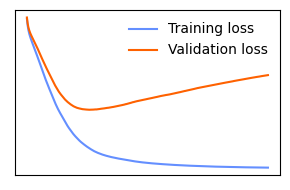

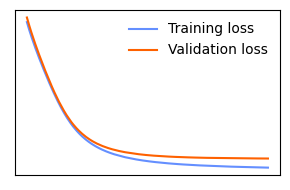

In [15]:
idx = training_set.names.index("training_log_gene_model10_3.json")
data = training_set.data[idx]

fig, ax = plt.subplots()
fig.set_size_inches(3, 2)

ax.plot(data['train_metric'], label="Training loss", color=COLOR_PLATE[0])
ax.plot(data['monitor_metric'], label="Validation loss", color=COLOR_PLATE[3])
# ax.set_ylabel("Loss")
# ax.set_xlabel("Epoch")
ax.legend(loc="upper right", frameon=False)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
fig.tight_layout()
saveFig(fig, "./figs/overfit_example.pdf")
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(3, 2)
idx = training_set.names.index("training_log_cancer_model4_3.json")
data = training_set.data[idx]
ax.plot(data['train_metric'], label="Training loss", color=COLOR_PLATE[0])
ax.plot(data['monitor_metric'], label="Validation loss", color=COLOR_PLATE[3])
# ax.set_ylabel("Loss")
# ax.set_xlabel("Epoch")
ax.legend(loc="upper right", frameon=False)

ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
fig.tight_layout()
saveFig(fig, "./figs/non_overfit_example.pdf")
plt.show()

100


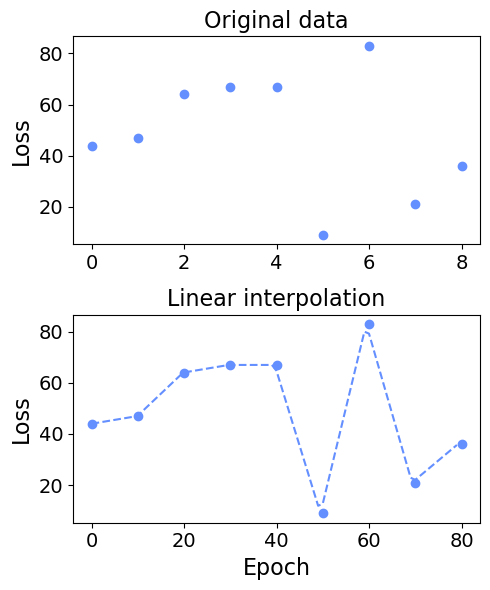

10


array([0.        , 0.09090909, 0.18181818, 0.27272727, 0.36363636,
       0.45454545, 0.54545455, 0.63636364, 0.72727273, 0.81818182,
       0.90909091, 1.        , 1.09090909, 1.18181818, 1.27272727,
       1.36363636, 1.45454545, 1.54545455, 1.63636364, 1.72727273,
       1.81818182, 1.90909091, 2.        , 2.09090909, 2.18181818,
       2.27272727, 2.36363636, 2.45454545, 2.54545455, 2.63636364,
       2.72727273, 2.81818182, 2.90909091, 3.        , 3.09090909,
       3.18181818, 3.27272727, 3.36363636, 3.45454545, 3.54545455,
       3.63636364, 3.72727273, 3.81818182, 3.90909091, 4.        ,
       4.09090909, 4.18181818, 4.27272727, 4.36363636, 4.45454545,
       4.54545455, 4.63636364, 4.72727273, 4.81818182, 4.90909091,
       5.        , 5.09090909, 5.18181818, 5.27272727, 5.36363636,
       5.45454545, 5.54545455, 5.63636364, 5.72727273, 5.81818182,
       5.90909091, 6.        , 6.09090909, 6.18181818, 6.27272727,
       6.36363636, 6.45454545, 6.54545455, 6.63636364, 6.72727

In [16]:
from core import tsprocess

# tmp = data["monitor_metric"][20:60]
np.random.seed(0)
tmp = np.random.randint(0, 100, size=10)
dst = tsprocess.stretchData(tmp, 100)
print(len(dst))
# tmp = data["monitor_metric"][:100]
fig, ax = plt.subplots(2, 1)
fig.set_size_inches(5, 6)

fontsize = 16
xs = np.arange((len(tmp)))
ax[0].scatter(xs[:9], tmp[:9], label="Training loss", color=COLOR_PLATE[0])
ax[0].set_title("Original data", fontsize=fontsize)
# ax[0].set_xlim(0, 9)
ax[1].scatter((xs * (len(dst) / len(tmp)))[:9], tmp[:9], label="Training loss", color=COLOR_PLATE[0])
ax[1].set_title("Linear interpolation", fontsize=fontsize)
ax[1].plot(dst[:80], ls="--", label="Training loss", color=COLOR_PLATE[0])
# ax.plot(data['monitor_metric'], label="Validation loss", color=COLOR_PLATE[3])

ax[0].set_xticks([0, 2, 4, 6, 8])
ax[1].set_xticks([0, 20, 40, 60, 80])
# ax[0].set_xlabel("Epoch", fontsize=fontsize)
ax[1].set_xlabel("Epoch", fontsize=fontsize)
ax[0].set_ylabel("Loss", fontsize=fontsize)
ax[1].set_ylabel("Loss", fontsize=fontsize)
ax[0].xaxis.set_tick_params(labelsize=fontsize - 2)
ax[0].yaxis.set_tick_params(labelsize=fontsize - 2)
ax[1].xaxis.set_tick_params(labelsize=fontsize - 2)
ax[1].yaxis.set_tick_params(labelsize=fontsize - 2)

fig.tight_layout()
saveFig(fig, "./figs/interpolate.pdf")
plt.show()

print(len(tmp))
np.arange(10)
# new_xloc = np.linspace(0, 10, dstLen)
np.linspace(0, 9, 100)

In [17]:
# TRAIN_DATA_PATH = pathlib.Path("./data/training/dataset_exp4")
# TRAIN_DATA_PATH = pathlib.Path("./double_descents_data")
TRAIN_DATA_PATH = pathlib.Path("./data/testing/real_world_data")
training_set = dataloader.TrainingLogDataset(TRAIN_DATA_PATH)
training_set.loadDataset()

# OUT_PATH = pathlib.Path("./out/cmp_early_stop")
# OUT_PATH = pathlib.Path("./out/dd_cmp_early_stop")
# OUT_PATH = pathlib.Path("./out/test_cmp_early_stop")
OUT_PATH = pathlib.Path("./out/test_cmp_early_stop_step10")
# OUT_PATH = pathlib.Path("./out/test_whole_history_trans")
OUT_PATH.mkdir(exist_ok=True)
print(training_set)

Loaded dataset from c:\Users\h84248579\Desktop\Onebox_Sync\overfitting_detection\data\testing\real_world_data:
    40 data, 40 labels 
    29 overfitting samples
    11 non_overfitting samples



## Optimal early-stopping as overfitting detection

In [18]:
opt_es_res = {
    "label": training_set.labels,
    "name": training_set.names,
    "is_early_stop": [],
    "early_stop_epoch": [],
    "early_best_epoch": [],
    "early_best_loss": [],
    "max_len": [],
}
is_optimal_es = []
optimal_es_epoch = []
optimal_es_loss = []
for data, label in zip(training_set.data, training_set.labels):
    min_value_epoch = np.argmin(data["monitor_metric"])
    opt_es_res["is_early_stop"].append(min_value_epoch != (len(data["monitor_metric"]) - 1))
    opt_es_res["early_stop_epoch"].append(len(data["monitor_metric"]) - 1)
    opt_es_res["early_best_epoch"].append(min_value_epoch)
    opt_es_res["early_best_loss"].append(data["monitor_metric"][min_value_epoch])
    opt_es_res["max_len"].append(len(data["monitor_metric"]))
opt_es_res = pd.DataFrame.from_dict(opt_es_res)
opt_es_res["early_stop_epoch"] = opt_es_res["early_stop_epoch"].astype(int)
opt_es_res["early_best_epoch"] = opt_es_res["early_best_epoch"].astype(int)
opt_es_res["is_early_stop"] = opt_es_res["is_early_stop"].astype(int)
opt_es_res.to_csv(OUT_PATH / "opt_es.csv", index=False)
for i in range(900, 1000, 10):
    # print(i, sum(opt_es_res["early_best_epoch"] >= i))
    print(i, classification_report(training_set.labels, (~(opt_es_res["early_best_epoch"] >= i)).astype(int)))
# print(classification_report(training_set.labels, opt_es_res["is_early_stop"]))

900               precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.72      1.00      0.84        29

    accuracy                           0.73        40
   macro avg       0.36      0.50      0.42        40
weighted avg       0.53      0.72      0.61        40

910               precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.72      1.00      0.84        29

    accuracy                           0.73        40
   macro avg       0.36      0.50      0.42        40
weighted avg       0.53      0.72      0.61        40

920               precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.72      1.00      0.84        29

    accuracy                           0.73        40
   macro avg       0.36      0.50      0.42        40
weighted avg       0.53      0.72      0.61        40

930    

c:\Users\h84248579\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\h84248579\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\h84248579\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\h84248579\Anaconda3\lib\site-packa

In [19]:
patiences = np.arange(5, 200, 5)
for patience in patiences:
    early_stop_res = {
        "label": training_set.labels,
        "name": training_set.names,
        "is_early_stop": [],
        "early_stop_epoch": [],
        "early_best_epoch": [],
        "early_best_loss": [],
        "max_len": [],
    }
    for data, label in zip(training_set.data, training_set.labels):
        is_early_stop, stop_epoch, best_epoch, best_loss = earlystop.detectEarlyStop(list(range(len(data["monitor_metric"]))), data["monitor_metric"], patience)
        early_stop_res["is_early_stop"].append(is_early_stop)
        early_stop_res["early_stop_epoch"].append(stop_epoch)
        early_stop_res["early_best_epoch"].append(best_epoch)
        early_stop_res["early_best_loss"].append(best_loss)
        early_stop_res["max_len"].append(len(data["monitor_metric"]))
    early_stop_res = pd.DataFrame.from_dict(early_stop_res)
    early_stop_res["early_stop_epoch"] = early_stop_res["early_stop_epoch"].astype(int)
    early_stop_res["early_best_epoch"] = early_stop_res["early_best_epoch"].astype(int)
    early_stop_res["is_early_stop"] = early_stop_res["is_early_stop"].astype(int)
    early_stop_res.to_csv(OUT_PATH / f"patience_{patience}.csv", index=False)

In [20]:
# early_stop_res["early_stop_epoch"].value_counts()
early_stop_res["early_best_epoch"].value_counts()

100    5
101    3
152    2
106    2
103    2
102    2
155    2
0      2
38     2
209    1
105    1
118    1
181    1
52     1
142    1
50     1
192    1
6      1
196    1
154    1
8      1
270    1
4      1
99     1
157    1
16     1
185    1
Name: early_best_epoch, dtype: int64

## Early Stopping as overfitting detection

In [21]:
patiences = np.arange(5, 200, 5)
for patience in patiences:
    file_name = f"patience_{patience}.csv"
    data = pd.read_csv(OUT_PATH / file_name)
    print("="*9, file_name, "="*9)
    # es_overfit = data["is_early_stop"].astype(np.int8)
    _, _, f1_scores, _ = sklearn.metrics.precision_recall_fscore_support(
        data["label"], data["is_early_stop"], zero_division=0
    )
    f1_score = np.mean(f1_scores)
    print(f1_score)
    # print(classification_report(early_stop_res["label"], es_overfit))

========= patience_5.csv =========
0.42028985507246375
========= patience_10.csv =========
0.42028985507246375
========= patience_15.csv =========
0.42028985507246375
========= patience_20.csv =========
0.42028985507246375
========= patience_25.csv =========
0.42028985507246375
========= patience_30.csv =========
0.5866819747416763
========= patience_35.csv =========
0.5866819747416763
========= patience_40.csv =========
0.5866819747416763
========= patience_45.csv =========
0.609375
========= patience_50.csv =========
0.8
========= patience_55.csv =========
0.8
========= patience_60.csv =========
0.7740112994350283
========= patience_65.csv =========
0.7740112994350283
========= patience_70.csv =========
0.7740112994350283
========= patience_75.csv =========
0.7740112994350283
========= patience_80.csv =========
0.7740112994350283
========= patience_85.csv =========
0.8119122257053292
========= patience_90.csv =========
0.8119122257053292
========= patience_95.csv =========
0.73818181

## The difference between optimal and non-optimal early-stopping

In [22]:
patiences = np.arange(5, 200, 5)
es_patience_res = {
    "patience": [],
    "correct_rate": [],
    "diff_btw_opt": [],
    "diff_btw_best_and_stop": [],
}
for patience in patiences:
    # print("="*9, f"patience {patience}", "="*9)
    opt_es_res = pd.read_csv(OUT_PATH / "opt_es.csv")
    file_name = f"patience_{patience}.csv"
    data = pd.read_csv(OUT_PATH / file_name)

    cut_off = opt_es_res["max_len"] - patience
    cut_off_mask = opt_es_res["early_best_epoch"] >= cut_off

    correct = opt_es_res["early_best_epoch"] == data["early_best_epoch"]
    # helper.printPercentage(sum(correct), len(correct), "same as optimal stopping point")
    opt_inspect = opt_es_res[~correct]
    es_inspect = data[~correct]
    diff_epoch = opt_inspect["early_best_epoch"] - es_inspect["early_best_epoch"]
    
    mask = data["early_stop_epoch"] == (data["max_len"] - 1)
    diff = data.loc[~mask, "early_stop_epoch"] - data.loc[~mask, "early_best_epoch"]
    # print("diff_epoch:", diff_epoch.median(), "diff:", diff.median())
    diff.value_counts()
    es_patience_res["patience"].append(patience)
    es_patience_res["correct_rate"].append(sum(correct) / len(correct))
    es_patience_res["diff_btw_opt"].append(diff_epoch.median())
    es_patience_res["diff_btw_best_and_stop"].append(diff.median())
es_patience_res = pd.DataFrame.from_dict(es_patience_res)
# es_patience_res["diff_btw_opt"] = es_patience_res["diff_btw_opt"].astype(int)
# es_patience_res["diff_btw_best_and_stop"] = es_patience_res["diff_btw_best_and_stop"].astype(int)
es_patience_res
    # epoch_diff = data["early_stop_epoch"] - data["early_best_epoch"]
    # print("median of difference:", diff_epoch.median(), "epoch_diff:", epoch_diff.median())

,patience,correct_rate,diff_btw_opt,diff_btw_best_and_stop
0,5,0.175,82.0,5.0
1,10,0.225,84.0,10.0
2,15,0.300,75.0,15.0
3,20,0.475,76.0,20.0
4,25,0.575,76.0,25.0
5,30,0.725,76.0,30.0
6,35,0.725,76.0,35.0
7,40,0.825,132.0,40.0
8,45,0.825,132.0,45.0
9,50,0.850,76.0,50.0


In [23]:
print(pd.DataFrame([len(data["monitor_metric"]) for data in training_set.data]).value_counts())
36 / len(data)

200    36
300     2
401     1
500     1
dtype: int64


0.9

In [24]:
# MAX_EPOCH = 1000
# early_stop_res["optimal_es_epoch"] = optimal_es
# for c in res_keys:
#     patience = int(c.split("_")[1])
#     cut_off = MAX_EPOCH - patience
#     cut_off_mask = early_stop_res["optimal_es_epoch"] >= cut_off
#     optimal_for_cmp = early_stop_res["optimal_es_epoch"].copy()
#     print("cut_off_nan:", sum(cut_off_mask))
#     optimal_for_cmp[cut_off_mask] = np.nan
#     opt_nan_mask = optimal_for_cmp.isna()
#     cur_nan_mask = early_stop_res[c].isna()
#     both_nan_mask = np.logical_and(opt_nan_mask, cur_nan_mask)
#     not_min_until_last = np.logical_and(opt_nan_mask, ~cur_nan_mask)
#     # print(early_stop_res[not_min_until_last])
#     diff = early_stop_res["optimal_es_epoch"][~opt_nan_mask] - early_stop_res[c][~opt_nan_mask]
#     early_stop_res[f"stop_before_optimal_{patience}"] = diff > 0
#     print(sum(opt_nan_mask), sum(cur_nan_mask), sum(both_nan_mask), sum(diff > 0))
#     print(c, np.mean(diff[diff > 0]), np.median(diff[diff > 0]))
#     # break


In [25]:
# print(len(early_stop_res))
# (early_stop_res["optimal_es_epoch"] - early_stop_res["es_185_epoch"]).value_counts()

## Time series classifiers runtime detection

In [26]:
models_path = pathlib.Path("./out")
# models = models_path.glob("*.plk")
model_path = list(models_path.glob("tsf_*.pkl"))[0]
model = helper.readPkl(model_path)
model
# model_path

c:\Users\h84248579\Anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
c:\Users\h84248579\Anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.24.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
c:\Users\h84248579\Anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator Pipeline from version 0.24.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
c:\Users\h84248579\Anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator GridSearchCV from version 0.24.2 when using version 0.24.1. This might lead to breaking 

In [27]:
%%script echo skipping
classifier_window = 100
step = classifier_window // 2
# step = 5

def addInfo(classifier_stop_res):
    dst_len = len(classifier_stop_res["is_stopped"])
    classifier_stop_res["label"] = training_set.labels[:dst_len]
    classifier_stop_res["name"] = training_set.names[:dst_len]
    classifier_stop_res["window_size"] = [classifier_window] * dst_len
    classifier_stop_res["step"] = [step] * dst_len
    return classifier_stop_res

classifier_stop_res = {
    # "label": training_set.labels,
    # "name": training_set.names,
    "is_stopped": [],
    "stop_epoch": [],
    "best_epoch": [],
    "best_loss": [],
    # "window_size": [classifier_window] * len(training_set.names),
    # "step": [step] * len(training_set.names),
}
for idx, name in enumerate(training_set.names):
    idx = training_set.names.index(name)
    cur_data = training_set.data[idx]
    for i in range(0, len(cur_data["monitor_metric"]) - classifier_window + step, step):
        end_epoch = i + classifier_window
        window_data = {n: d[i:end_epoch] for n, d in cur_data.items()}
        processed_data = model.preprocessor.process([window_data])
        res = model.predict(processed_data)
        if res:
            best_epoch = np.argmin(cur_data["monitor_metric"][:end_epoch])
            best_loss = cur_data["monitor_metric"][best_epoch]
            classifier_stop_res["is_stopped"].append(1)
            classifier_stop_res["stop_epoch"].append(end_epoch - 1)
            classifier_stop_res["best_epoch"].append(best_epoch)
            classifier_stop_res["best_loss"].append(best_loss)
            break
    else:
        best_epoch = np.argmin(cur_data["monitor_metric"])
        best_loss = cur_data["monitor_metric"][best_epoch]
        classifier_stop_res["is_stopped"].append(0)
        classifier_stop_res["stop_epoch"].append(len(cur_data["monitor_metric"]) - 1)
        classifier_stop_res["best_epoch"].append(best_epoch)
        classifier_stop_res["best_loss"].append(best_loss)
    # break
    if idx % 50 == 0:
        print(f"{idx}/{len(training_set.names)}")
        classifier_stop_res = addInfo(classifier_stop_res)
        tmp = pd.DataFrame.from_dict(classifier_stop_res)
        tmp.to_csv(OUT_PATH / f"{model_path.stem}.csv", index=False)
classifier_stop_res = addInfo(classifier_stop_res)
classifier_stop_res = pd.DataFrame.from_dict(classifier_stop_res)
classifier_stop_res.to_csv(OUT_PATH / f"{model_path.stem}.csv", index=False)

Couldn't find program: 'echo'


========= knndtw_2022_09_01_10_57_59_20_20.csv =========
40 40 40
38 / 40 = 95.0% same as optimal stopping point
median of difference: 138.5
median of epoch diff: 43.5 max: 199 min: 3
========= tsf_2022_09_20_21_43_16_20_20.csv =========
40 40 40
36 / 40 = 90.0% same as optimal stopping point
median of difference: 111.0
median of epoch diff: 35.0 max: 103 min: 0
========= tsbf_2022_09_20_21_43_07_20_20.csv =========
40 40 40
33 / 40 = 82.5% same as optimal stopping point
median of difference: 121.0
median of epoch diff: 31.0 max: 129 min: 2
========= bossvs_2022_09_20_21_48_44_20_20.csv =========
40 40 40
26 / 40 = 65.0% same as optimal stopping point
median of difference: 74.5
median of epoch diff: 21.0 max: 191 min: 0
========= hmmgmm_2022_09_25_01_11_13_20_20.csv =========
40 40 40
7 / 40 = 17.5% same as optimal stopping point
median of difference: 86.0
median of epoch diff: 0.0 max: 55 min: 0
========= saxvsm_2022_09_20_21_44_14_20_20.csv =========
40 40 40
13 / 40 = 32.5% same as 

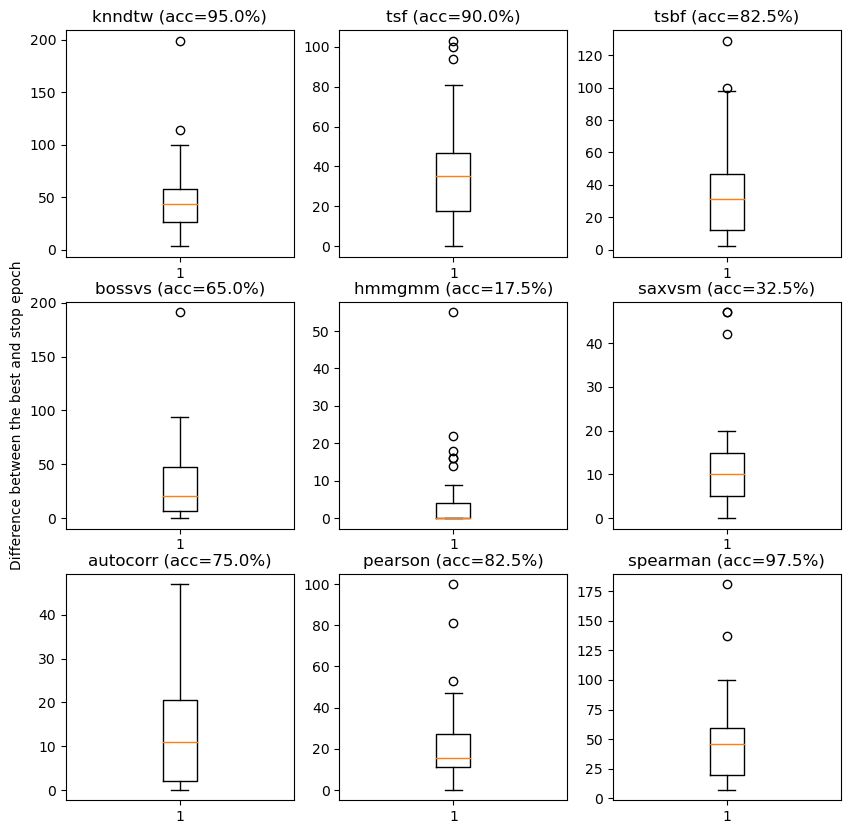

In [28]:
# %%script echo skipping

WHOLE_HIS_OUT_PATH = pathlib.Path("./out/test_whole_history_trans")

# FOR whole history
WINDOW_SIZES = [20,]
# cls_names = ["knndtw", "tsf", "tsbf", "bossvs", "hmmgmm", "saxvsm", "autocorr", "pearson", "spearman"]
fig, axs = plt.subplots(3, 3)
fig.set_size_inches(10, 10)
for window_size in WINDOW_SIZES:
    # for step in [1, 5, 10]:
    for step in [20, ]:
        for idx, cls_name in enumerate(["knndtw", "tsf", "tsbf", "bossvs", "hmmgmm", "saxvsm", "autocorr", "pearson", "spearman"]):
            dp = list(WHOLE_HIS_OUT_PATH.glob(f"{cls_name}_*_{window_size}_{step}.csv"))[0]
            print("="*9, dp.name, "="*9)
            data = pd.read_csv(dp)
            data = data.sort_values("name").reset_index()
            opt_es_res = pd.read_csv(WHOLE_HIS_OUT_PATH / "opt_es.csv")
            opt_es_res = opt_es_res.sort_values("name").reset_index()
            print(len(opt_es_res), len(data), sum(opt_es_res["name"] == data["name"]))

            correct = opt_es_res["early_best_epoch"] == data["best_epoch"]
            helper.printPercentage(sum(correct), len(correct), "same as optimal stopping point")
            acc = sum(correct) / len(correct)
            opt_inspect = opt_es_res[~correct]
            es_inspect = data[~correct]
            diff_epoch = opt_inspect["early_best_epoch"] - es_inspect["best_epoch"]
            print("median of difference:", diff_epoch.median())

            # mask = data["stop_epoch"] == (opt_es_res["max_len"] - 1)
            # diff = data.loc[~mask, "stop_epoch"] - data.loc[~mask, "best_epoch"]
            diff = data["stop_epoch"] - data["best_epoch"]

            ax = axs.item(idx)
            ax.set_title(f"{cls_name} (acc={acc*100}%)")
            ax.boxplot(diff)
            print(f"median of epoch diff:", diff.median(), "max:", diff.max(), "min:", diff.min())
axs.item(3).set_ylabel("Difference between the best and stop epoch")
plt.savefig("./figs/whole_history.pdf")
plt.show()

========= knndtw_2022_09_21_01_15_37_20_10.csv =========
40 40 40
31 / 40 = 77.5% same as optimal stopping point
[all stop] median of epoch diff: 31.0 max: 199 min: 0
========= hmmgmm_2022_09_20_21_42_14_20_10.csv =========
40 40 40
8 / 40 = 20.0% same as optimal stopping point
[all stop] median of epoch diff: 5.0 max: 19 min: 0
========= tsf_2022_09_20_21_43_16_20_10.csv =========
40 40 40
21 / 40 = 52.5% same as optimal stopping point
[all stop] median of epoch diff: 12.5 max: 75 min: 2
========= tsbf_2022_09_20_21_43_07_20_10.csv =========
40 40 40
9 / 40 = 22.5% same as optimal stopping point
[all stop] median of epoch diff: 8.5 max: 23 min: 0
========= bossvs_2022_09_20_21_48_44_20_10.csv =========
40 40 40
27 / 40 = 67.5% same as optimal stopping point
[all stop] median of epoch diff: 7.0 max: 199 min: 0
========= saxvsm_2022_09_20_21_44_14_20_10.csv =========
40 40 40
8 / 40 = 20.0% same as optimal stopping point
[all stop] median of epoch diff: 4.0 max: 19 min: 0


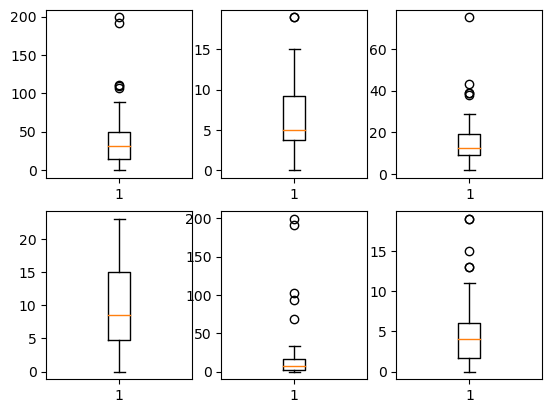

========= knndtw_2022_09_21_01_15_37_40_10.csv =========
40 40 40
33 / 40 = 82.5% same as optimal stopping point
[all stop] median of epoch diff: 27.0 max: 295 min: 0
========= hmmgmm_2022_09_20_21_42_14_40_10.csv =========
40 40 40
8 / 40 = 20.0% same as optimal stopping point
[all stop] median of epoch diff: 6.5 max: 39 min: 0
========= tsf_2022_09_20_21_43_16_40_10.csv =========
40 40 40
22 / 40 = 55.00000000000001% same as optimal stopping point
[all stop] median of epoch diff: 22.0 max: 49 min: 4
========= tsbf_2022_09_20_21_43_07_40_10.csv =========
40 40 40
15 / 40 = 37.5% same as optimal stopping point
[all stop] median of epoch diff: 15.0 max: 45 min: 0
========= bossvs_2022_09_20_21_48_44_40_10.csv =========
40 40 40
34 / 40 = 85.0% same as optimal stopping point
[all stop] median of epoch diff: 29.0 max: 229 min: 3
========= saxvsm_2022_09_20_21_44_14_40_10.csv =========
40 40 40
9 / 40 = 22.5% same as optimal stopping point
[all stop] median of epoch diff: 11.0 max: 39 min:

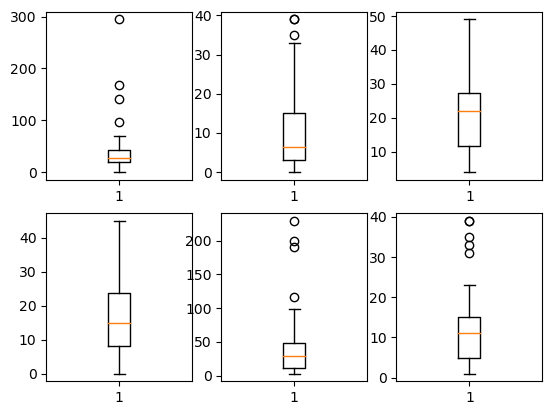

========= knndtw_2022_09_21_01_15_37_60_10.csv =========
40 40 40
37 / 40 = 92.5% same as optimal stopping point
[all stop] median of epoch diff: 37.5 max: 199 min: 3
========= hmmgmm_2022_09_20_21_42_14_60_10.csv =========
40 40 40
12 / 40 = 30.0% same as optimal stopping point
[all stop] median of epoch diff: 16.5 max: 59 min: 0
========= tsf_2022_09_20_21_43_16_60_10.csv =========
40 40 40
32 / 40 = 80.0% same as optimal stopping point
[all stop] median of epoch diff: 31.0 max: 69 min: 1
========= tsbf_2022_09_20_21_43_07_60_10.csv =========
40 40 40
19 / 40 = 47.5% same as optimal stopping point
[all stop] median of epoch diff: 25.0 max: 69 min: 0
========= bossvs_2022_09_20_21_48_44_60_10.csv =========
40 40 40
36 / 40 = 90.0% same as optimal stopping point
[all stop] median of epoch diff: 34.5 max: 229 min: 1
========= saxvsm_2022_09_20_21_44_14_60_10.csv =========
40 40 40
10 / 40 = 25.0% same as optimal stopping point
[all stop] median of epoch diff: 9.5 max: 59 min: 0


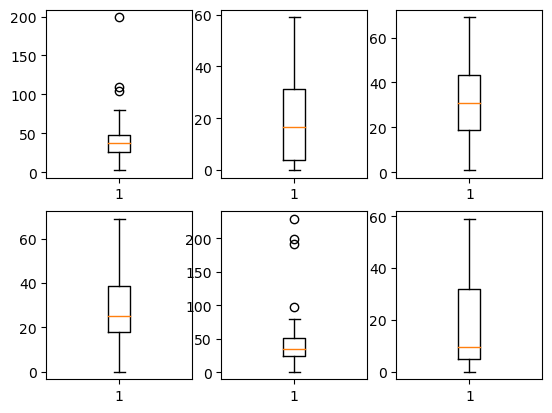

========= knndtw_2022_09_21_01_15_37_80_10.csv =========
40 40 40
39 / 40 = 97.5% same as optimal stopping point
[all stop] median of epoch diff: 42.5 max: 199 min: 3
========= hmmgmm_2022_09_20_21_42_14_80_10.csv =========
40 40 40
15 / 40 = 37.5% same as optimal stopping point
[all stop] median of epoch diff: 28.0 max: 79 min: 0
========= tsf_2022_09_20_21_43_16_80_10.csv =========
40 40 40
35 / 40 = 87.5% same as optimal stopping point
[all stop] median of epoch diff: 39.5 max: 81 min: 3
========= tsbf_2022_09_20_21_43_07_80_10.csv =========
40 40 40
28 / 40 = 70.0% same as optimal stopping point
[all stop] median of epoch diff: 37.0 max: 89 min: 0
========= bossvs_2022_09_20_21_48_44_80_10.csv =========
40 40 40
35 / 40 = 87.5% same as optimal stopping point
[all stop] median of epoch diff: 48.5 max: 219 min: 0
========= saxvsm_2022_09_20_21_44_14_80_10.csv =========
40 40 40
11 / 40 = 27.500000000000004% same as optimal stopping point
[all stop] median of epoch diff: 16.0 max: 79 

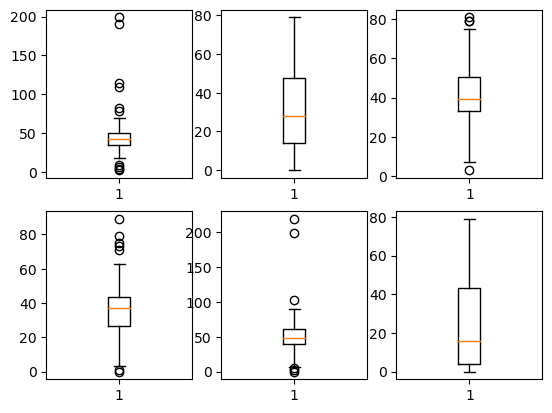

========= knndtw_2022_09_21_01_15_37_100_10.csv =========
40 40 40
39 / 40 = 97.5% same as optimal stopping point
[all stop] median of epoch diff: 45.5 max: 191 min: 3
========= hmmgmm_2022_09_20_21_42_14_100_10.csv =========
40 40 40
29 / 40 = 72.5% same as optimal stopping point
[all stop] median of epoch diff: 41.5 max: 99 min: 3
========= tsf_2022_09_20_21_43_16_100_10.csv =========
40 40 40
39 / 40 = 97.5% same as optimal stopping point
[all stop] median of epoch diff: 44.0 max: 99 min: 3
========= tsbf_2022_09_20_21_43_07_100_10.csv =========
40 40 40
35 / 40 = 87.5% same as optimal stopping point
[all stop] median of epoch diff: 47.0 max: 99 min: 5
========= bossvs_2022_09_20_21_48_44_100_10.csv =========
40 40 40
38 / 40 = 95.0% same as optimal stopping point
[all stop] median of epoch diff: 56.5 max: 229 min: 7
========= saxvsm_2022_09_20_21_44_14_100_10.csv =========
40 40 40
20 / 40 = 50.0% same as optimal stopping point
[all stop] median of epoch diff: 24.0 max: 99 min: 1


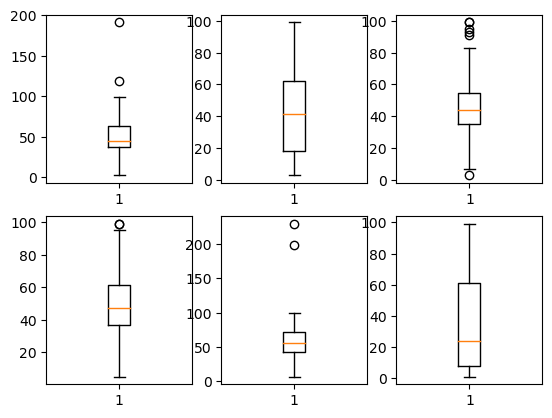

,window,cls,acc,median_delay
0,20,knndtw,0.775,31.0
1,20,hmmgmm,0.200,5.0
2,20,tsf,0.525,12.5
3,20,tsbf,0.225,8.5
4,20,bossvs,0.675,7.0
5,20,saxvsm,0.200,4.0
6,40,knndtw,0.825,27.0
7,40,hmmgmm,0.200,6.5
8,40,tsf,0.550,22.0
9,40,tsbf,0.375,15.0


In [99]:
# %%script echo skipping
# for rolling window
res = {
    "window": [],
    "cls": [],
    "acc": [],
    # "es_acc": [],
    "median_delay": [],
}
WINDOW_SIZES = [20, 40, 60, 80, 100]
# WINDOW_SIZES = [10, 25, 50, 75, 100]
for window_size in WINDOW_SIZES:
    # for step in [1, 5, 10]:
    fig, axs = plt.subplots(2, 3)
    for step in [10, ]:
        for idx, cls_name in enumerate(["knndtw", "hmmgmm", "tsf", "tsbf", "bossvs", "saxvsm"]):
        # for idx, cls_name in enumerate(["knndtw", "bossvs", "tsf"]):
            # dp = list(OUT_PATH.glob(f"{cls_name}_*_100_25.csv"))[0]
            dp = list(OUT_PATH.glob(f"{cls_name}_*_{window_size}_{step}.csv"))[0]
            print("="*9, dp.name, "="*9)
            data = pd.read_csv(dp)
            data = data.sort_values("name").reset_index()
            opt_es_res = pd.read_csv(OUT_PATH / "opt_es.csv")
            opt_es_res = opt_es_res.sort_values("name").reset_index()
            print(len(opt_es_res), len(data), sum(opt_es_res["name"] == data["name"]))

            correct = opt_es_res["early_best_epoch"] == data["best_epoch"]
            helper.printPercentage(sum(correct), len(correct), "same as optimal stopping point")
            opt_inspect = opt_es_res[~correct]
            es_inspect = data[~correct]
            diff_epoch = opt_inspect["early_best_epoch"] - es_inspect["best_epoch"]
            # plt.boxplot(diff_epoch)
            # print("median of difference:", diff_epoch.median())

            mask = data["stop_epoch"] == (opt_es_res["max_len"] - 1)
            diff = data.loc[~mask, "stop_epoch"] - data.loc[~mask, "best_epoch"]
            # diff = data["stop_epoch"] - data["best_epoch"]

            # print("[optimal stop] median of epoch diff:", diff.median(), "max:", diff.max(), "min:", diff.min())

            diff = data["stop_epoch"] - data["best_epoch"]
            print("[all stop] median of epoch diff:", diff.median(), "max:", diff.max(), "min:", diff.min())
            # data["stop_epoch"].value_counts()

            res["window"].append(window_size)
            res["cls"].append(cls_name)
            res["acc"].append(sum(correct) / len(correct))
            # res["es_acc"].append(window_size)
            res["median_delay"].append(diff.median())
            ax = axs.item(idx)
            ax.boxplot(diff)
        plt.show()
            # data.loc[~mask, "best_epoch"].value_counts()
            # data[~mask][["stop_epoch", "best_epoch"]]
pd.DataFrame.from_dict(res)

In [30]:
%%script echo skipping
for cls_name in ["knndtw", "tsf", "tsbf", "bossvs", "hmmgmm", "saxvsm"]:
    # dp = list(OUT_PATH.glob(f"{cls_name}_*_100_25.csv"))[0]
    dp = list(OUT_PATH.glob(f"{cls_name}_*_50_10.csv"))[0]
    print("="*9, dp.name, "="*9)
    data = pd.read_csv(dp)
    data = data.sort_values("name").reset_index()
    opt_es_res = pd.read_csv(OUT_PATH / "opt_es.csv")
    opt_es_res = opt_es_res.sort_values("name").reset_index()
    print(len(opt_es_res), len(data), sum(opt_es_res["name"] == data["name"]))

    correct = opt_es_res["early_best_epoch"] == data["best_epoch"]
    helper.printPercentage(sum(correct), len(correct), "same as optimal stopping point")
    opt_inspect = opt_es_res[~correct]
    es_inspect = data[~correct]
    diff_epoch = opt_inspect["early_best_epoch"] - es_inspect["best_epoch"]
    # plt.boxplot(diff_epoch)
    print("median of difference:", diff_epoch.median())

    mask = data["stop_epoch"] == (opt_es_res["max_len"] - 1)
    diff = data.loc[~mask, "stop_epoch"] - data.loc[~mask, "best_epoch"]
    # diff = data["stop_epoch"] - data["best_epoch"]

    plt.boxplot(diff)
    print("median of epoch diff:", diff.median())
    # data["stop_epoch"].value_counts()

    # data.loc[~mask, "best_epoch"].value_counts()
    # data[~mask][["stop_epoch", "best_epoch"]]

Couldn't find program: 'echo'


In [31]:
%%script echo skipping
for cls_name in ["knndtw", "tsf", "tsbf", "bossvs", "hmmgmm", "saxvsm"]:
    dp = list(OUT_PATH.glob(f"{cls_name}_*_25_5.csv"))[0]
    print("="*9, dp.name, "="*9)
    data = pd.read_csv(dp)
    data = data.sort_values("name").reset_index()
    opt_es_res = pd.read_csv(OUT_PATH / "opt_es.csv")
    opt_es_res = opt_es_res.sort_values("name").reset_index()
    print(len(opt_es_res), len(data), sum(opt_es_res["name"] == data["name"]))

    correct = opt_es_res["early_best_epoch"] == data["best_epoch"]
    helper.printPercentage(sum(correct), len(correct), "same as optimal stopping point")
    opt_inspect = opt_es_res[~correct]
    es_inspect = data[~correct]
    diff_epoch = opt_inspect["early_best_epoch"] - es_inspect["best_epoch"]
    print("median of difference:", diff_epoch.median())

    mask = data["stop_epoch"] == (opt_es_res["max_len"] - 1)
    diff = data.loc[~mask, "stop_epoch"] - data.loc[~mask, "best_epoch"]
    plt.boxplot(diff)
    print("median of epoch diff:", diff.median())

Couldn't find program: 'echo'


## Comparing early stopping with online time series classifiers

patience 20 vs. window 20 step 10
19 / 40 = 47.5% same as optimal stopping point [early-stopping]
21 / 40 = 52.5% same as optimal stopping point [time series classifier]
loss higher 8, equal 19, lower 13
earlier_mask: 20
[earlier_mask tsc] same_as_opt: 9
earlier but same 12 diff_epoch_median: 8.0
[equal_mask]: 1
same_as_opt: 0
[later_mask]: 19
same_as_opt: 12
higher loss 0 equal loss 6 lower loss 13
later but same 6 diff_epoch_median: -19.0
later diff: -33.0


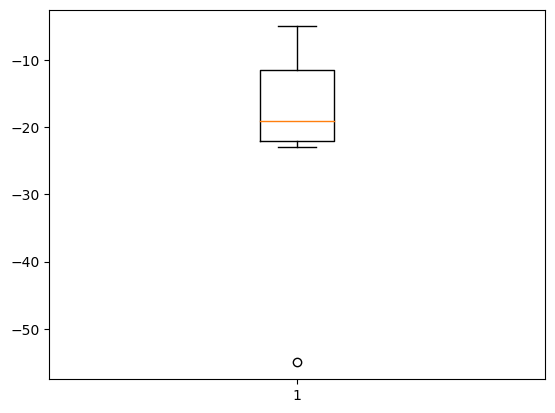

patience 20 vs. window 40 step 10
19 / 40 = 47.5% same as optimal stopping point [early-stopping]
22 / 40 = 55.00000000000001% same as optimal stopping point [time series classifier]
loss higher 3, equal 25, lower 12
earlier_mask: 9
[earlier_mask tsc] same_as_opt: 4
earlier but same 6 diff_epoch_median: 7.5
[equal_mask]: 2
same_as_opt: 1
[later_mask]: 29
same_as_opt: 17
higher loss 0 equal loss 17 lower loss 12
later but same 17 diff_epoch_median: -7.0
later diff: -20.0


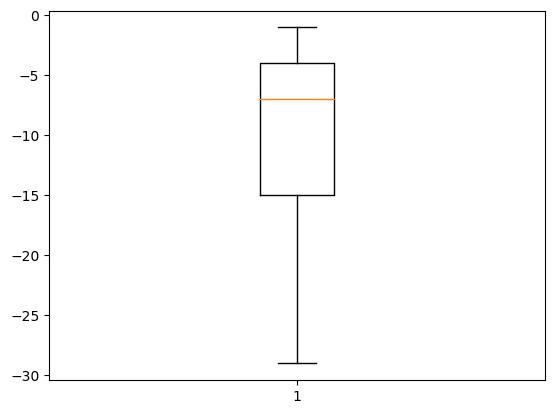

patience 20 vs. window 60 step 10
19 / 40 = 47.5% same as optimal stopping point [early-stopping]
32 / 40 = 80.0% same as optimal stopping point [time series classifier]
loss higher 0, equal 23, lower 17
earlier_mask: 1
[earlier_mask tsc] same_as_opt: 1
earlier but same 1 diff_epoch_median: 2.0
[equal_mask]: 0
same_as_opt: 0
[later_mask]: 39
same_as_opt: 31
higher loss 0 equal loss 22 lower loss 17
later but same 22 diff_epoch_median: -14.5
later diff: -31.0


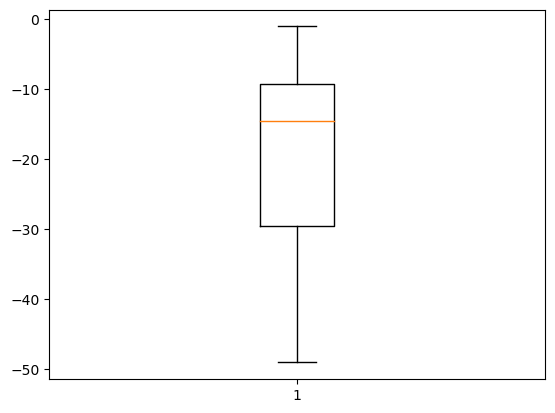

patience 20 vs. window 80 step 10
19 / 40 = 47.5% same as optimal stopping point [early-stopping]
35 / 40 = 87.5% same as optimal stopping point [time series classifier]
loss higher 0, equal 22, lower 18
earlier_mask: 0
[earlier_mask tsc] same_as_opt: 0
earlier but same 0 diff_epoch_median: nan
[equal_mask]: 0
same_as_opt: 0
[later_mask]: 40
same_as_opt: 35
higher loss 0 equal loss 22 lower loss 18
later but same 22 diff_epoch_median: -24.0
later diff: -46.5


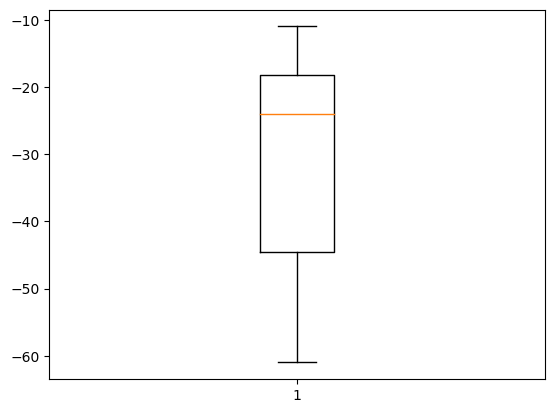

patience 20 vs. window 100 step 10
19 / 40 = 47.5% same as optimal stopping point [early-stopping]
39 / 40 = 97.5% same as optimal stopping point [time series classifier]
loss higher 0, equal 20, lower 20
earlier_mask: 0
[earlier_mask tsc] same_as_opt: 0
earlier but same 0 diff_epoch_median: nan
[equal_mask]: 0
same_as_opt: 0
[later_mask]: 40
same_as_opt: 39
higher loss 0 equal loss 20 lower loss 20
later but same 20 diff_epoch_median: -29.5
later diff: -63.0


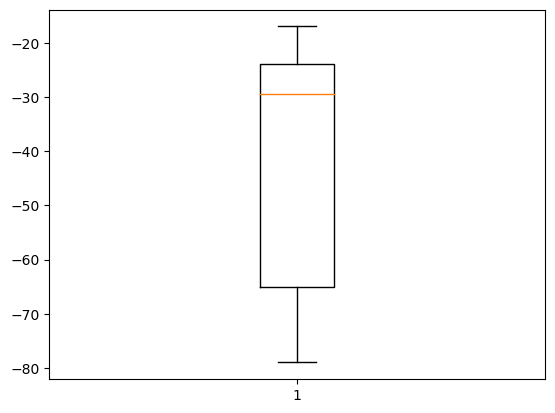

patience 40 vs. window 20 step 10
33 / 40 = 82.5% same as optimal stopping point [early-stopping]
21 / 40 = 52.5% same as optimal stopping point [time series classifier]
loss higher 14, equal 25, lower 1
earlier_mask: 36
[earlier_mask tsc] same_as_opt: 18
earlier but same 22 diff_epoch_median: 24.0
[equal_mask]: 1
same_as_opt: 1
[later_mask]: 3
same_as_opt: 2
higher loss 0 equal loss 2 lower loss 1
later but same 2 diff_epoch_median: -19.0
later diff: -35.0


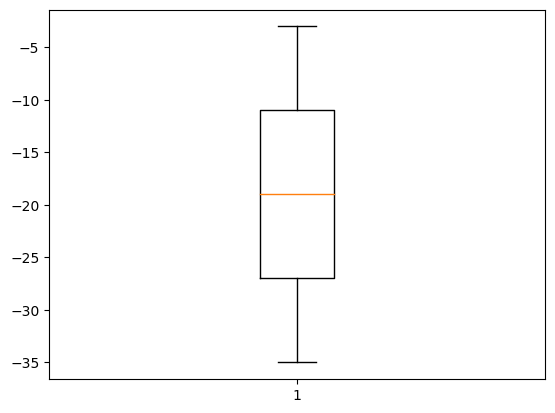

patience 40 vs. window 40 step 10
33 / 40 = 82.5% same as optimal stopping point [early-stopping]
22 / 40 = 55.00000000000001% same as optimal stopping point [time series classifier]
loss higher 13, equal 25, lower 2
earlier_mask: 34
[earlier_mask tsc] same_as_opt: 19
earlier but same 21 diff_epoch_median: 16.0
[equal_mask]: 2
same_as_opt: 1
[later_mask]: 4
same_as_opt: 2
higher loss 0 equal loss 2 lower loss 2
later but same 2 diff_epoch_median: -7.0
later diff: -25.5


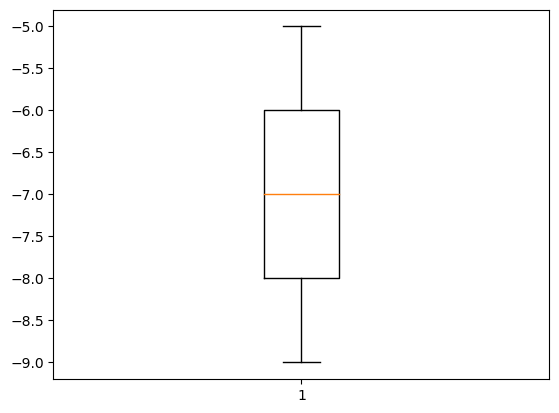

patience 40 vs. window 60 step 10
33 / 40 = 82.5% same as optimal stopping point [early-stopping]
32 / 40 = 80.0% same as optimal stopping point [time series classifier]
loss higher 4, equal 32, lower 4
earlier_mask: 22
[earlier_mask tsc] same_as_opt: 17
earlier but same 18 diff_epoch_median: 12.0
[equal_mask]: 3
same_as_opt: 2
[later_mask]: 15
same_as_opt: 13
higher loss 0 equal loss 11 lower loss 4
later but same 11 diff_epoch_median: -11.0
later diff: -15.0


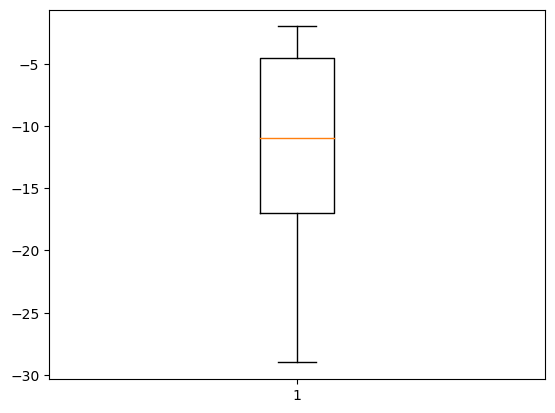

patience 40 vs. window 80 step 10
33 / 40 = 82.5% same as optimal stopping point [early-stopping]
35 / 40 = 87.5% same as optimal stopping point [time series classifier]
loss higher 1, equal 35, lower 4
earlier_mask: 16
[earlier_mask tsc] same_as_opt: 15
earlier but same 15 diff_epoch_median: 6.0
[equal_mask]: 3
same_as_opt: 3
[later_mask]: 21
same_as_opt: 17
higher loss 0 equal loss 17 lower loss 4
later but same 17 diff_epoch_median: -15.0
later diff: -23.0


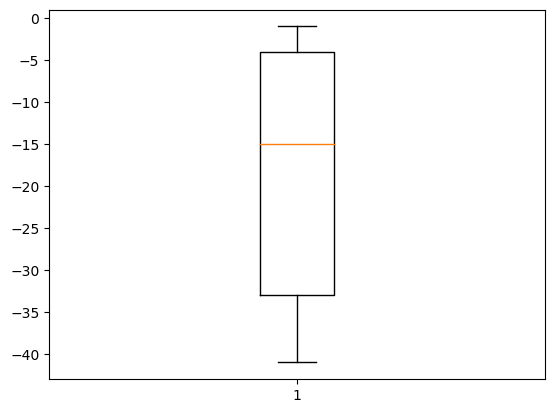

patience 40 vs. window 100 step 10
33 / 40 = 82.5% same as optimal stopping point [early-stopping]
39 / 40 = 97.5% same as optimal stopping point [time series classifier]
loss higher 0, equal 34, lower 6
earlier_mask: 10
[earlier_mask tsc] same_as_opt: 10
earlier but same 10 diff_epoch_median: 7.0
[equal_mask]: 2
same_as_opt: 2
[later_mask]: 28
same_as_opt: 27
higher loss 0 equal loss 22 lower loss 6
later but same 22 diff_epoch_median: -8.0
later diff: -21.0


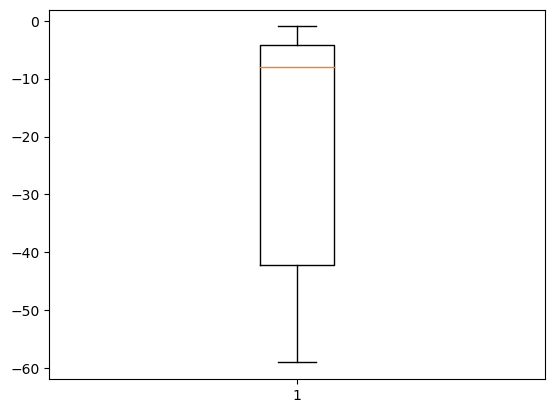

patience 60 vs. window 20 step 10
36 / 40 = 90.0% same as optimal stopping point [early-stopping]
21 / 40 = 52.5% same as optimal stopping point [time series classifier]
loss higher 16, equal 23, lower 1
earlier_mask: 37
[earlier_mask tsc] same_as_opt: 19
earlier but same 21 diff_epoch_median: 45.0
[equal_mask]: 1
same_as_opt: 1
[later_mask]: 2
same_as_opt: 1
higher loss 0 equal loss 1 lower loss 1
later but same 1 diff_epoch_median: -15.0
later diff: -20.0


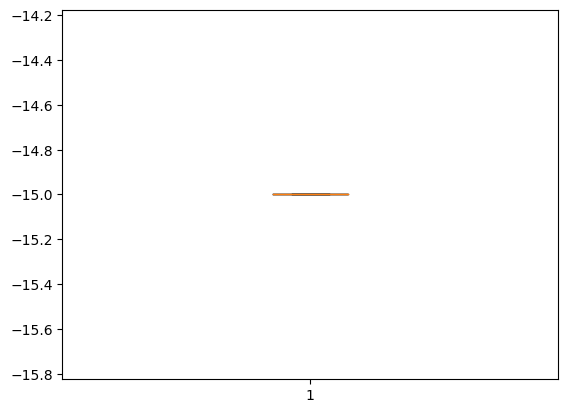

patience 60 vs. window 40 step 10
36 / 40 = 90.0% same as optimal stopping point [early-stopping]
22 / 40 = 55.00000000000001% same as optimal stopping point [time series classifier]
loss higher 15, equal 24, lower 1
earlier_mask: 38
[earlier_mask tsc] same_as_opt: 20
earlier but same 23 diff_epoch_median: 33.0
[equal_mask]: 1
same_as_opt: 1
[later_mask]: 1
same_as_opt: 1
higher loss 0 equal loss 0 lower loss 1
later but same 0 diff_epoch_median: nan
later diff: -35.0


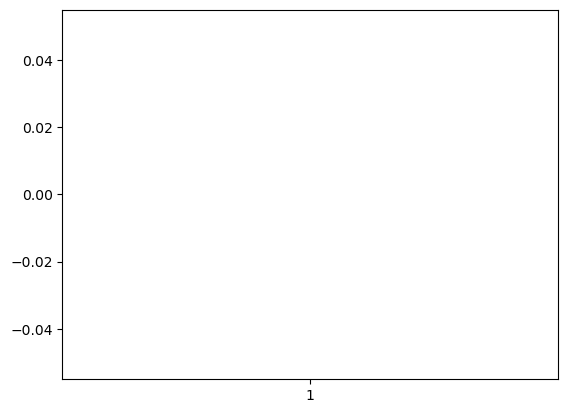

patience 60 vs. window 60 step 10
36 / 40 = 90.0% same as optimal stopping point [early-stopping]
32 / 40 = 80.0% same as optimal stopping point [time series classifier]
loss higher 5, equal 34, lower 1
earlier_mask: 29
[earlier_mask tsc] same_as_opt: 22
earlier but same 24 diff_epoch_median: 29.0
[equal_mask]: 8
same_as_opt: 8
[later_mask]: 3
same_as_opt: 2
higher loss 0 equal loss 2 lower loss 1
later but same 2 diff_epoch_median: -7.0
later diff: -9.0


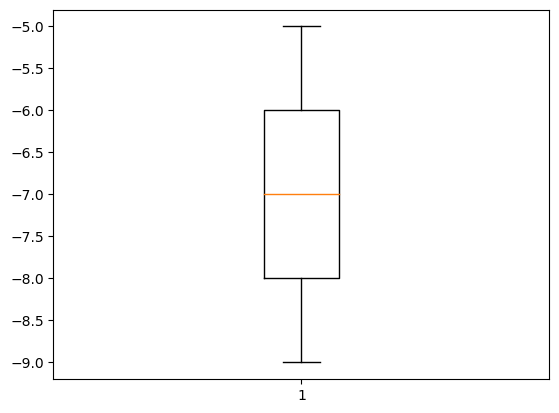

patience 60 vs. window 80 step 10
36 / 40 = 90.0% same as optimal stopping point [early-stopping]
35 / 40 = 87.5% same as optimal stopping point [time series classifier]
loss higher 2, equal 37, lower 1
earlier_mask: 24
[earlier_mask tsc] same_as_opt: 21
earlier but same 22 diff_epoch_median: 22.5
[equal_mask]: 8
same_as_opt: 7
[later_mask]: 8
same_as_opt: 7
higher loss 0 equal loss 7 lower loss 1
later but same 7 diff_epoch_median: -15.0
later diff: -17.0


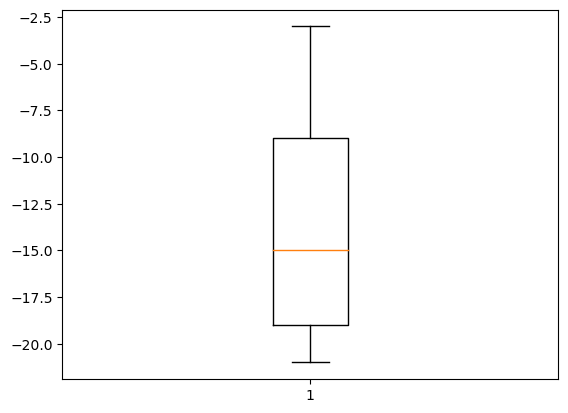

patience 60 vs. window 100 step 10
36 / 40 = 90.0% same as optimal stopping point [early-stopping]
39 / 40 = 97.5% same as optimal stopping point [time series classifier]
loss higher 0, equal 37, lower 3
earlier_mask: 18
[earlier_mask tsc] same_as_opt: 18
earlier but same 18 diff_epoch_median: 21.5
[equal_mask]: 10
same_as_opt: 10
[later_mask]: 12
same_as_opt: 11
higher loss 0 equal loss 9 lower loss 3
later but same 9 diff_epoch_median: -31.0
later diff: -34.0


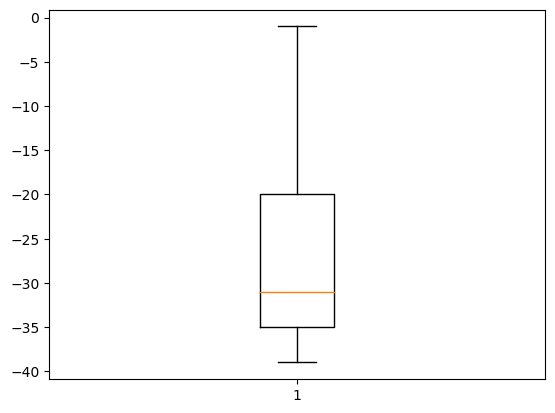

patience 80 vs. window 20 step 10
39 / 40 = 97.5% same as optimal stopping point [early-stopping]
21 / 40 = 52.5% same as optimal stopping point [time series classifier]
loss higher 18, equal 22, lower 0
earlier_mask: 39
[earlier_mask tsc] same_as_opt: 20
earlier but same 21 diff_epoch_median: 65.0
[equal_mask]: 1
same_as_opt: 1
[later_mask]: 0
same_as_opt: 0
higher loss 0 equal loss 0 lower loss 0
later but same 0 diff_epoch_median: nan
later diff: nan


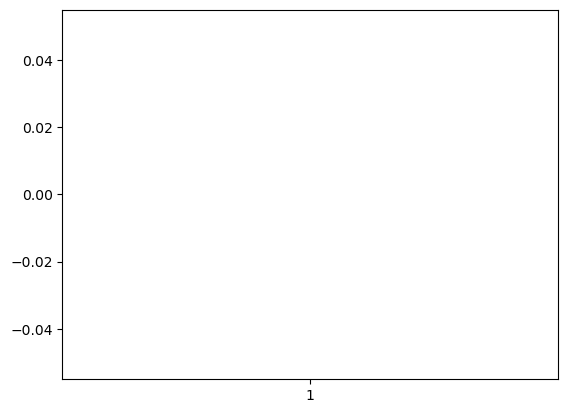

patience 80 vs. window 40 step 10
39 / 40 = 97.5% same as optimal stopping point [early-stopping]
22 / 40 = 55.00000000000001% same as optimal stopping point [time series classifier]
loss higher 17, equal 23, lower 0
earlier_mask: 39
[earlier_mask tsc] same_as_opt: 21
earlier but same 22 diff_epoch_median: 53.0
[equal_mask]: 1
same_as_opt: 1
[later_mask]: 0
same_as_opt: 0
higher loss 0 equal loss 0 lower loss 0
later but same 0 diff_epoch_median: nan
later diff: nan


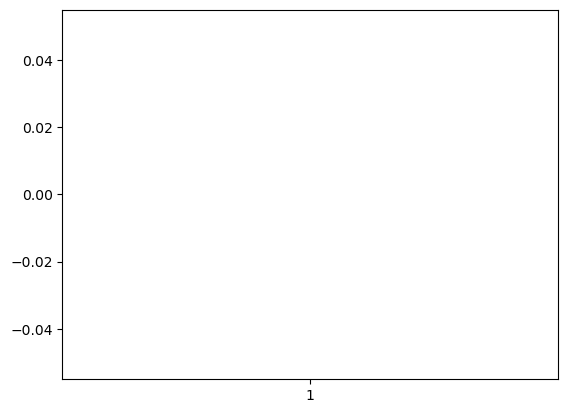

patience 80 vs. window 60 step 10
39 / 40 = 97.5% same as optimal stopping point [early-stopping]
32 / 40 = 80.0% same as optimal stopping point [time series classifier]
loss higher 7, equal 33, lower 0
earlier_mask: 33
[earlier_mask tsc] same_as_opt: 25
earlier but same 26 diff_epoch_median: 47.0
[equal_mask]: 7
same_as_opt: 7
[later_mask]: 0
same_as_opt: 0
higher loss 0 equal loss 0 lower loss 0
later but same 0 diff_epoch_median: nan
later diff: nan


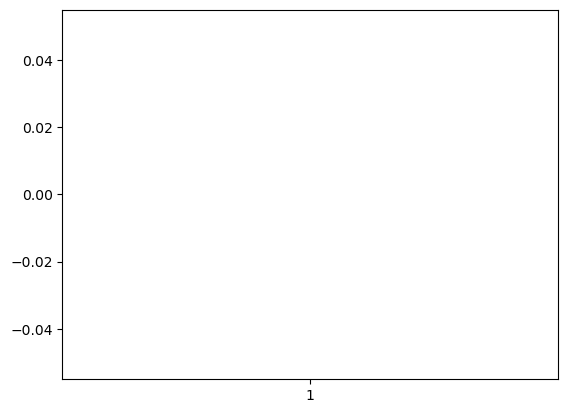

patience 80 vs. window 80 step 10
39 / 40 = 97.5% same as optimal stopping point [early-stopping]
35 / 40 = 87.5% same as optimal stopping point [time series classifier]
loss higher 4, equal 36, lower 0
earlier_mask: 32
[earlier_mask tsc] same_as_opt: 27
earlier but same 28 diff_epoch_median: 39.5
[equal_mask]: 7
same_as_opt: 7
[later_mask]: 1
same_as_opt: 1
higher loss 0 equal loss 1 lower loss 0
later but same 1 diff_epoch_median: -1.0
later diff: -1.0


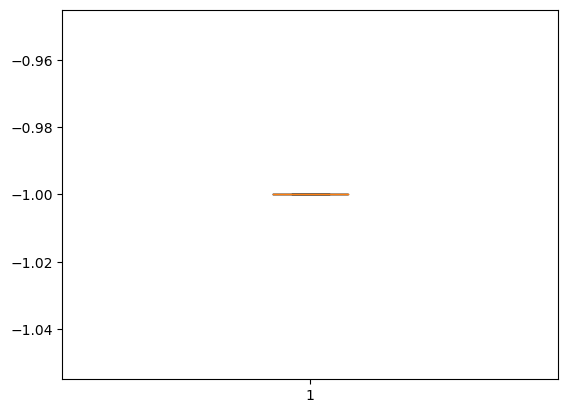

patience 80 vs. window 100 step 10
39 / 40 = 97.5% same as optimal stopping point [early-stopping]
39 / 40 = 97.5% same as optimal stopping point [time series classifier]
loss higher 0, equal 40, lower 0
earlier_mask: 24
[earlier_mask tsc] same_as_opt: 24
earlier but same 24 diff_epoch_median: 40.0
[equal_mask]: 10
same_as_opt: 9
[later_mask]: 6
same_as_opt: 6
higher loss 0 equal loss 6 lower loss 0
later but same 6 diff_epoch_median: -14.0
later diff: -14.0


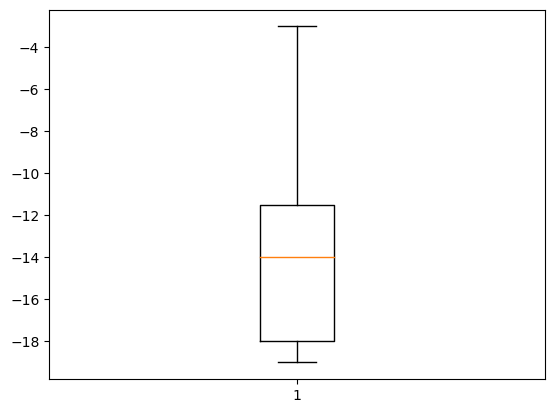

patience 100 vs. window 20 step 10
40 / 40 = 100.0% same as optimal stopping point [early-stopping]
21 / 40 = 52.5% same as optimal stopping point [time series classifier]
loss higher 19, equal 21, lower 0
earlier_mask: 39
[earlier_mask tsc] same_as_opt: 20
earlier but same 20 diff_epoch_median: 82.0
[equal_mask]: 1
same_as_opt: 1
[later_mask]: 0
same_as_opt: 0
higher loss 0 equal loss 0 lower loss 0
later but same 0 diff_epoch_median: nan
later diff: nan


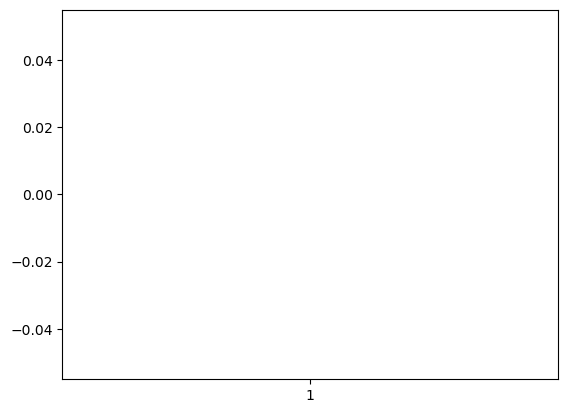

patience 100 vs. window 40 step 10
40 / 40 = 100.0% same as optimal stopping point [early-stopping]
22 / 40 = 55.00000000000001% same as optimal stopping point [time series classifier]
loss higher 18, equal 22, lower 0
earlier_mask: 39
[earlier_mask tsc] same_as_opt: 21
earlier but same 21 diff_epoch_median: 70.0
[equal_mask]: 1
same_as_opt: 1
[later_mask]: 0
same_as_opt: 0
higher loss 0 equal loss 0 lower loss 0
later but same 0 diff_epoch_median: nan
later diff: nan


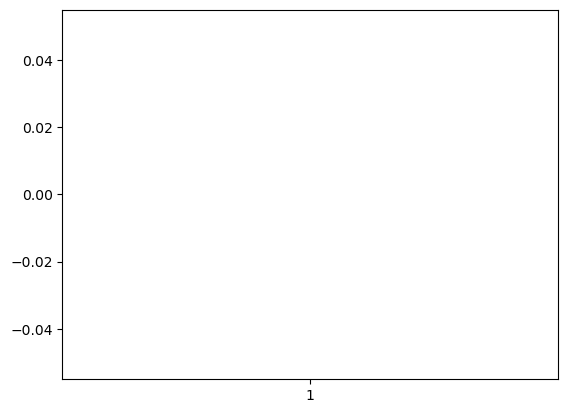

patience 100 vs. window 60 step 10
40 / 40 = 100.0% same as optimal stopping point [early-stopping]
32 / 40 = 80.0% same as optimal stopping point [time series classifier]
loss higher 8, equal 32, lower 0
earlier_mask: 33
[earlier_mask tsc] same_as_opt: 25
earlier but same 25 diff_epoch_median: 60.0
[equal_mask]: 7
same_as_opt: 7
[later_mask]: 0
same_as_opt: 0
higher loss 0 equal loss 0 lower loss 0
later but same 0 diff_epoch_median: nan
later diff: nan


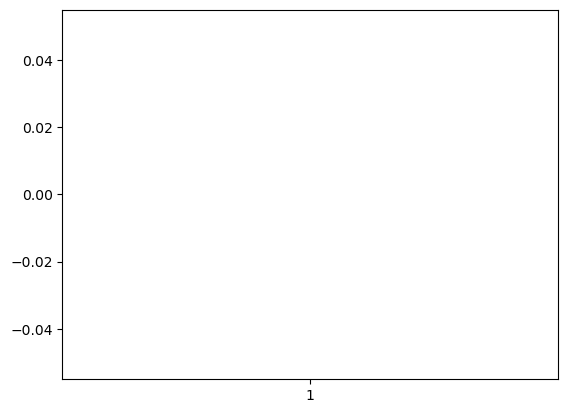

patience 100 vs. window 80 step 10
40 / 40 = 100.0% same as optimal stopping point [early-stopping]
35 / 40 = 87.5% same as optimal stopping point [time series classifier]
loss higher 5, equal 35, lower 0
earlier_mask: 33
[earlier_mask tsc] same_as_opt: 28
earlier but same 28 diff_epoch_median: 59.0
[equal_mask]: 7
same_as_opt: 7
[later_mask]: 0
same_as_opt: 0
higher loss 0 equal loss 0 lower loss 0
later but same 0 diff_epoch_median: nan
later diff: nan


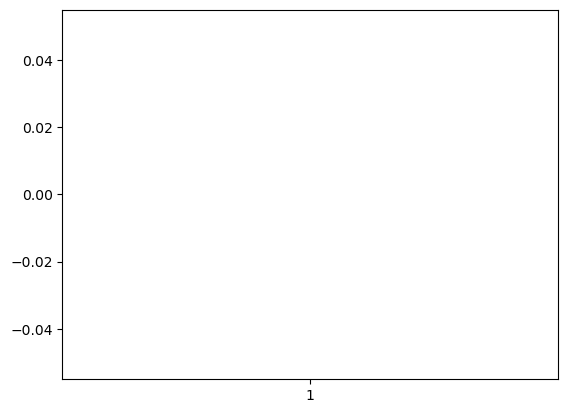

patience 100 vs. window 100 step 10
40 / 40 = 100.0% same as optimal stopping point [early-stopping]
39 / 40 = 97.5% same as optimal stopping point [time series classifier]
loss higher 1, equal 39, lower 0
earlier_mask: 31
[earlier_mask tsc] same_as_opt: 30
earlier but same 30 diff_epoch_median: 50.0
[equal_mask]: 9
same_as_opt: 9
[later_mask]: 0
same_as_opt: 0
higher loss 0 equal loss 0 lower loss 0
later but same 0 diff_epoch_median: nan
later diff: nan


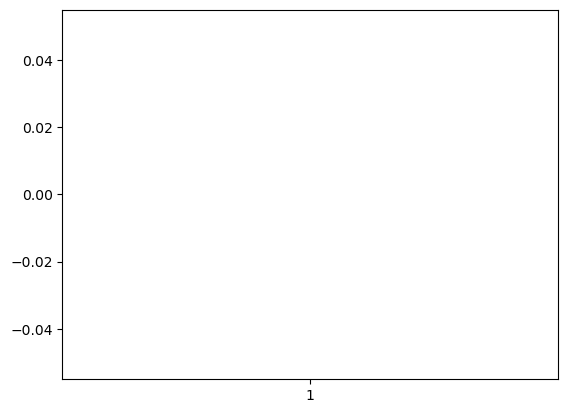

In [34]:
# for rolling window
patiences = [20, 40, 60, 80, 100]
# patiences = WINDOW_SIZES
# window_sizes = [10, 25, 50, 75, 100]
window_sizes = WINDOW_SIZES
# step = 10

# patiences = [25, ]
# window_sizes = [50, ]
# steps = [1, 5, 10]
steps = [10, ]
# steps = [20, ]

cls_name = "tsf"
# cls_name = "spearman"
# cls_name = "bossvs"

for patience in patiences:
    # for window, step in zip(window_sizes, steps):
    for window in window_sizes:
        # if abs(patience - window) > 50:
        #     continue
        for step in steps:
            print(f"patience {patience} vs. window {window} step {step}")
            # print("="*9, dp.name, "="*9)
            # optimal
            opt_res = pd.read_csv(OUT_PATH / "opt_es.csv")
            # early stop
            file_name = f"patience_{patience}.csv"
            es_res = pd.read_csv(OUT_PATH / file_name)
            # time series classifier
            # try:
            dp = list(OUT_PATH.glob(f"{cls_name}_*_{window}_{step}.csv"))[0]
            # except:
            #     print("Using step = 5")
            #     dp = list(OUT_PATH.glob(f"{cls_name}_*_{window}_5.csv"))[0]
            tsc_res = pd.read_csv(dp)
            # sorting to the same order
            tsc_res = tsc_res.sort_values("name").reset_index().copy()
            es_res = es_res.sort_values("name").reset_index().copy()
            opt_res = opt_res.sort_values("name").reset_index().copy()
            del tsc_res["index"]
            if "index" in opt_res:
                del opt_res["index"]
            assert len(opt_res) == len(data)
            assert len(opt_res) == sum(opt_res["name"] == tsc_res["name"])
            assert len(opt_res) == sum(es_res["name"] == tsc_res["name"])

            es_correct = (opt_res["early_best_epoch"] == es_res["early_best_epoch"])
            helper.printPercentage(sum(es_correct), len(es_correct), "same as optimal stopping point [early-stopping]")
            tsc_correct = (opt_res["early_best_epoch"] == tsc_res["best_epoch"])
            tsc_correct_list = []
            for e1, e2 in zip(opt_res["early_best_epoch"], tsc_res["best_epoch"]):
                if e1 == e2:
                    tsc_correct_list.append(True)
                else:
                    tsc_correct_list.append(False)
            helper.printPercentage(sum(tsc_correct), len(tsc_correct), "same as optimal stopping point [time series classifier]")

            loss_higher_mask = tsc_res["best_loss"] > es_res["early_best_loss"]
            loss_equal_mask = tsc_res["best_loss"] == es_res["early_best_loss"]
            loss_lower_mask = tsc_res["best_loss"] < es_res["early_best_loss"]
            print(f"loss higher {sum(loss_higher_mask)}, equal {sum(loss_equal_mask)}, lower {sum(loss_lower_mask)}")
            
            # stopped early
            earlier_mask = tsc_res["stop_epoch"] < es_res["early_stop_epoch"]
            print("earlier_mask:", sum(earlier_mask))
            print("[earlier_mask tsc] same_as_opt:", sum(np.logical_and(tsc_correct, earlier_mask)))
            earlier_same_loss_mask = np.logical_and(loss_equal_mask, earlier_mask)
            earlier_same_diff = es_res.loc[earlier_same_loss_mask, "early_stop_epoch"] - tsc_res.loc[earlier_same_loss_mask, "stop_epoch"]
            print("earlier but same", sum(earlier_same_loss_mask), "diff_epoch_median:", earlier_same_diff.median())

            # equal
            equal_mask = tsc_res["stop_epoch"] == es_res["early_stop_epoch"]
            print("[equal_mask]:", sum(equal_mask))
            print("same_as_opt:", sum(np.logical_and(tsc_correct, equal_mask)))
            
            # stopped lately
            # 1. improved
            # 2. not improved
            # 3. best
            later_mask = tsc_res["stop_epoch"] > es_res["early_stop_epoch"]
            print("[later_mask]:", sum(later_mask))
            print("same_as_opt:", sum(np.logical_and(tsc_correct, later_mask)))
            print(
                "higher loss", sum(np.logical_and(loss_higher_mask, later_mask)),
                "equal loss", sum(np.logical_and(loss_equal_mask, later_mask)),
                "lower loss", sum(np.logical_and(loss_lower_mask, later_mask)),
            )
            later_same_loss_mask = np.logical_and(loss_equal_mask, later_mask)
            later_same_diff = es_res.loc[later_same_loss_mask, "early_stop_epoch"] - tsc_res.loc[later_same_loss_mask, "stop_epoch"]
            later_diff = es_res.loc[later_mask, "early_stop_epoch"] - tsc_res.loc[later_mask, "stop_epoch"]
            print("later but same", sum(later_same_loss_mask), "diff_epoch_median:", later_same_diff.median())
            print("later diff:", later_diff.median())


            # print(not_improved_mask.index[not_improved_mask])
            # print(opt_res.iloc[not_improved_mask.index[not_improved_mask]]["early_stop_epoch"])
            # same_as_opt = opt_res.iloc[not_improved_mask.index[not_improved_mask]]["early_stop_epoch"] == tsc_res.iloc[not_improved_mask.index[not_improved_mask]]["stop_epoch"]
            # print("[not_improved_mask] same_as_opt:", sum(same_as_opt))

            # print(opt_res.iloc[improved_mask.index]["early_stop_epoch"])
            # print(tsc_res.iloc[improved_mask.index]["stop_epoch"])
            # assert sum(opt_res.iloc[improved_mask.index[improved_mask]]["early_stop_epoch"] < tsc_res.iloc[improved_mask.index[improved_mask]]["stop_epoch"]) == 0
            # same_as_opt = opt_res.iloc[improved_mask.index[improved_mask]]["early_stop_epoch"] == tsc_res.iloc[improved_mask.index[improved_mask]]["stop_epoch"]
            # print("same_as_opt:", sum(same_as_opt))

            # best_mask = improved_mask
            plt.boxplot(later_same_diff)
            plt.show()
            # raise ValueError

========= knndtw =========
patience 20 vs. window 20 step 10
19 / 40 = 47.5% same as optimal stopping point [early-stopping]
31 / 40 = 77.5% same as optimal stopping point [time series classifier]
19 / 40 = 47.5% Both stopped at the optimal point
0 / 19 = 0.0% stopped at the same epoch
3 / 19 = 15.789473684210526% stopped earlier
16 / 19 = 84.21052631578947% stopped later


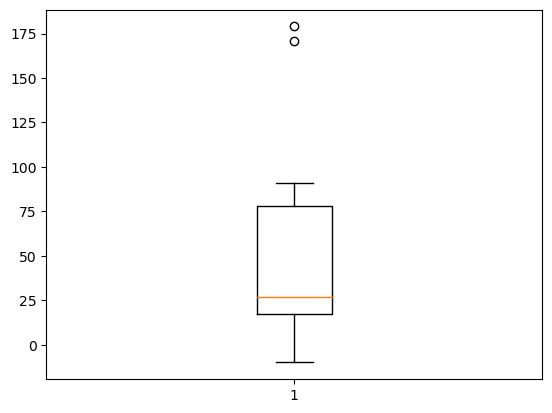

========= bossvs =========
patience 20 vs. window 20 step 10
19 / 40 = 47.5% same as optimal stopping point [early-stopping]
27 / 40 = 67.5% same as optimal stopping point [time series classifier]
15 / 40 = 37.5% Both stopped at the optimal point
0 / 15 = 0.0% stopped at the same epoch
8 / 15 = 53.333333333333336% stopped earlier
7 / 15 = 46.666666666666664% stopped later


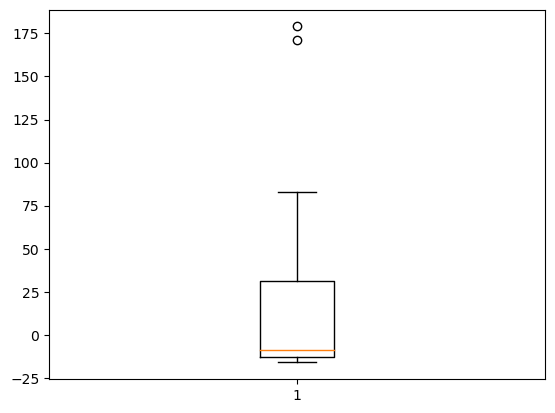

========= knndtw =========
patience 40 vs. window 40 step 10
33 / 40 = 82.5% same as optimal stopping point [early-stopping]
33 / 40 = 82.5% same as optimal stopping point [time series classifier]
27 / 40 = 67.5% Both stopped at the optimal point
2 / 27 = 7.4074074074074066% stopped at the same epoch
16 / 27 = 59.25925925925925% stopped earlier
9 / 27 = 33.33333333333333% stopped later


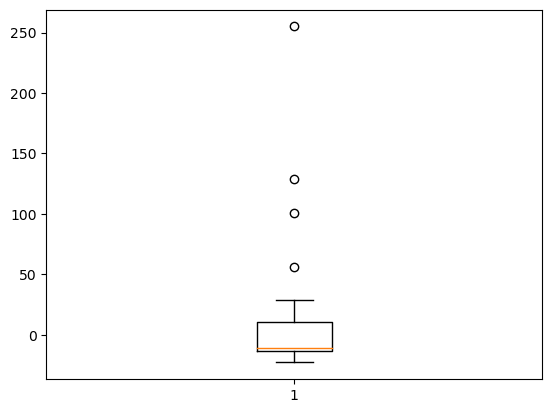

========= bossvs =========
patience 40 vs. window 40 step 10
33 / 40 = 82.5% same as optimal stopping point [early-stopping]
34 / 40 = 85.0% same as optimal stopping point [time series classifier]
28 / 40 = 70.0% Both stopped at the optimal point
1 / 28 = 3.571428571428571% stopped at the same epoch
18 / 28 = 64.28571428571429% stopped earlier
9 / 28 = 32.142857142857146% stopped later


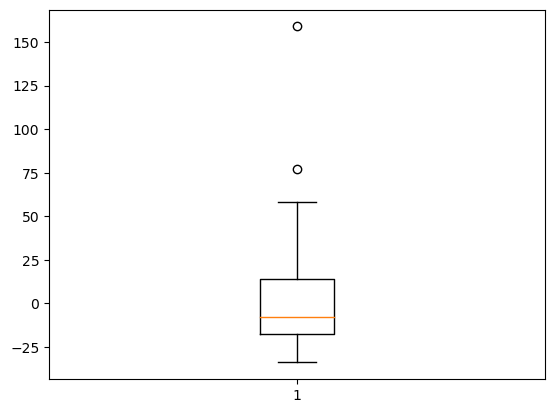

========= knndtw =========
patience 60 vs. window 60 step 10
36 / 40 = 90.0% same as optimal stopping point [early-stopping]
37 / 40 = 92.5% same as optimal stopping point [time series classifier]
35 / 40 = 87.5% Both stopped at the optimal point
8 / 35 = 22.857142857142858% stopped at the same epoch
21 / 35 = 60.0% stopped earlier
6 / 35 = 17.142857142857142% stopped later


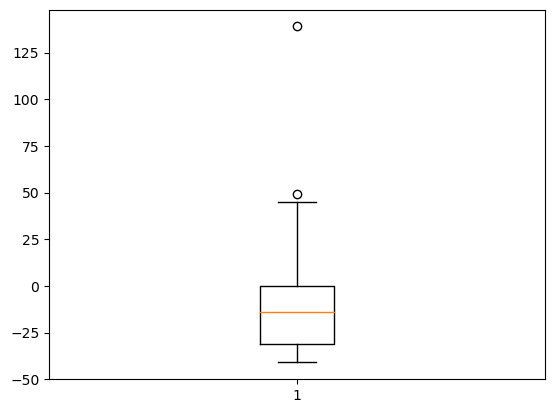

========= bossvs =========
patience 60 vs. window 60 step 10
36 / 40 = 90.0% same as optimal stopping point [early-stopping]
36 / 40 = 90.0% same as optimal stopping point [time series classifier]
32 / 40 = 80.0% Both stopped at the optimal point
5 / 32 = 15.625% stopped at the same epoch
20 / 32 = 62.5% stopped earlier
7 / 32 = 21.875% stopped later


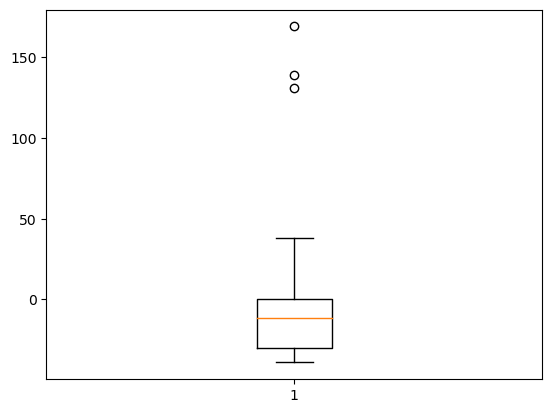

========= knndtw =========
patience 80 vs. window 80 step 10
39 / 40 = 97.5% same as optimal stopping point [early-stopping]
39 / 40 = 97.5% same as optimal stopping point [time series classifier]
39 / 40 = 97.5% Both stopped at the optimal point
8 / 39 = 20.51282051282051% stopped at the same epoch
26 / 39 = 66.66666666666666% stopped earlier
5 / 39 = 12.82051282051282% stopped later


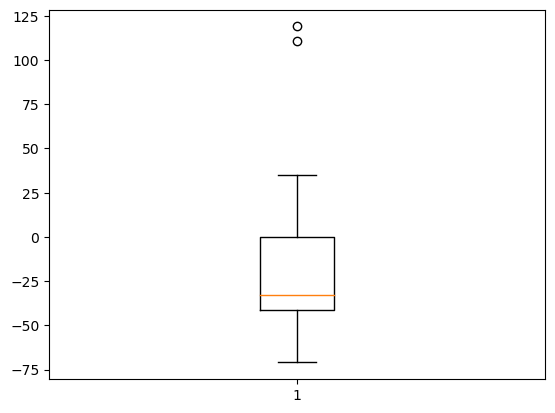

========= bossvs =========
patience 80 vs. window 80 step 10
39 / 40 = 97.5% same as optimal stopping point [early-stopping]
35 / 40 = 87.5% same as optimal stopping point [time series classifier]
35 / 40 = 87.5% Both stopped at the optimal point
7 / 35 = 20.0% stopped at the same epoch
24 / 35 = 68.57142857142857% stopped earlier
4 / 35 = 11.428571428571429% stopped later


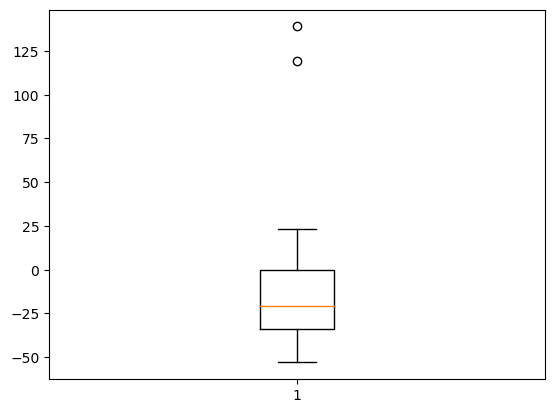

========= knndtw =========
patience 100 vs. window 100 step 10
40 / 40 = 100.0% same as optimal stopping point [early-stopping]
39 / 40 = 97.5% same as optimal stopping point [time series classifier]
39 / 40 = 97.5% Both stopped at the optimal point
8 / 39 = 20.51282051282051% stopped at the same epoch
29 / 39 = 74.35897435897436% stopped earlier
2 / 39 = 5.128205128205128% stopped later


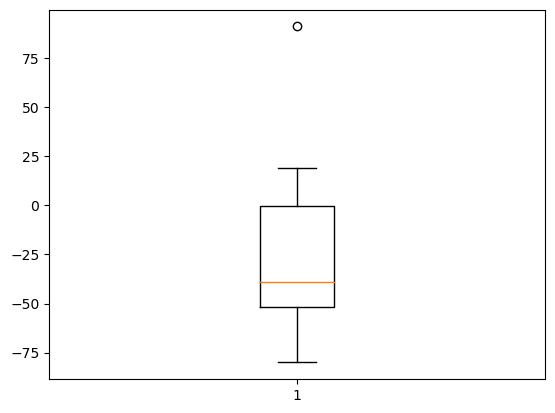

========= bossvs =========
patience 100 vs. window 100 step 10
40 / 40 = 100.0% same as optimal stopping point [early-stopping]
38 / 40 = 95.0% same as optimal stopping point [time series classifier]
38 / 40 = 95.0% Both stopped at the optimal point
8 / 38 = 21.052631578947366% stopped at the same epoch
28 / 38 = 73.68421052631578% stopped earlier
2 / 38 = 5.263157894736842% stopped later


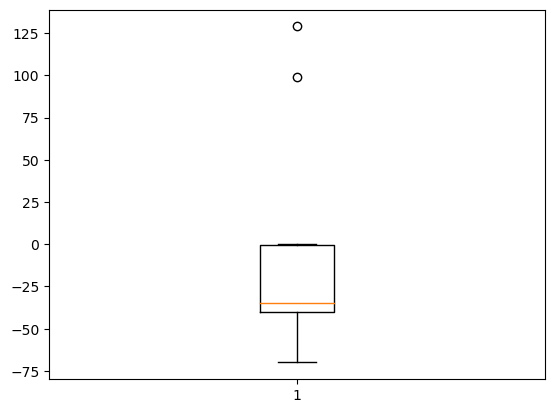

,cls,accuracy,same,earlier,later,epoch,es accuracy
0,knndtw,0.775,0.000000,0.157895,0.842105,20,0.475
1,bossvs,0.675,0.000000,0.533333,0.466667,20,0.475
2,knndtw,0.825,0.074074,0.592593,0.333333,40,0.825
3,bossvs,0.850,0.035714,0.642857,0.321429,40,0.825
4,knndtw,0.925,0.228571,0.600000,0.171429,60,0.900
5,bossvs,0.900,0.156250,0.625000,0.218750,60,0.900
6,knndtw,0.975,0.205128,0.666667,0.128205,80,0.975
7,bossvs,0.875,0.200000,0.685714,0.114286,80,0.975
8,knndtw,0.975,0.205128,0.743590,0.051282,100,1.000
9,bossvs,0.950,0.210526,0.736842,0.052632,100,1.000


In [ ]:
patiences = WINDOW_SIZES
window_sizes = WINDOW_SIZES
steps = [10, ]

cls_names = ["knndtw", "bossvs"]
# cls_name = "bossvs"

res = {
    "cls": [],
    "accuracy": [],
    "same": [],
    "earlier": [],
    "later": [],
    "epoch": [],
    "es accuracy": [],
}
for patience in patiences:
    # for window, step in zip(window_sizes, steps):
    for window in window_sizes:
        for cls_name in cls_names:
            if abs(patience - window) > 10:
                continue
            for step in steps:
                print("="*9, cls_name, "="*9)
                print(f"patience {patience} vs. window {window} step {step}")
                # optimal
                opt_res = pd.read_csv(OUT_PATH / "opt_es.csv")
                # early stop
                file_name = f"patience_{patience}.csv"
                es_res = pd.read_csv(OUT_PATH / file_name)
                # time series classifier
                dp = list(OUT_PATH.glob(f"{cls_name}_*_{window}_{step}.csv"))[0]
                tsc_res = pd.read_csv(dp)
                # sorting to the same order
                tsc_res = tsc_res.sort_values("name").reset_index().copy()
                es_res = es_res.sort_values("name").reset_index().copy()
                opt_res = opt_res.sort_values("name").reset_index().copy()
                del tsc_res["index"]
                if "index" in opt_res:
                    del opt_res["index"]
                assert len(opt_res) == len(data)
                assert len(opt_res) == sum(opt_res["name"] == tsc_res["name"])
                assert len(opt_res) == sum(es_res["name"] == tsc_res["name"])

                es_correct = (opt_res["early_best_epoch"] == es_res["early_best_epoch"])
                helper.printPercentage(sum(es_correct), len(es_correct), "same as optimal stopping point [early-stopping]")
                tsc_correct = (opt_res["early_best_epoch"] == tsc_res["best_epoch"])
                tsc_correct_list = []
                for e1, e2 in zip(opt_res["early_best_epoch"], tsc_res["best_epoch"]):
                    if e1 == e2:
                        tsc_correct_list.append(True)
                    else:
                        tsc_correct_list.append(False)
                helper.printPercentage(sum(tsc_correct), len(tsc_correct), "same as optimal stopping point [time series classifier]")

                both_correct = np.logical_and(es_correct, tsc_correct)
                helper.printPercentage(sum(both_correct), len(both_correct),"Both stopped at the optimal point")
                diff_epoch_both_correct = tsc_res.loc[both_correct, "stop_epoch"] - es_res.loc[both_correct, "early_stop_epoch"]
                helper.printPercentage(sum(diff_epoch_both_correct == 0), len(diff_epoch_both_correct), "stopped at the same epoch")
                helper.printPercentage(sum(diff_epoch_both_correct < 0), len(diff_epoch_both_correct), "stopped earlier")
                helper.printPercentage(sum(diff_epoch_both_correct > 0), len(diff_epoch_both_correct), "stopped later")

                res["cls"].append(cls_name)
                res["accuracy"].append(sum(tsc_correct) / len(tsc_correct))
                res["es accuracy"].append(sum(es_correct) / len(es_correct))
                res["epoch"].append(patience)

                res["same"].append(sum(diff_epoch_both_correct == 0) / len(diff_epoch_both_correct))
                res["earlier"].append(sum(diff_epoch_both_correct < 0) / len(diff_epoch_both_correct))
                res["later"].append(sum(diff_epoch_both_correct > 0) / len(diff_epoch_both_correct))
                plt.boxplot(diff_epoch_both_correct)
                plt.show()
res = pd.DataFrame.from_dict(res)
res

In [ ]:
res = res.sort_values(["epoch", "cls"])
np.round(res[["earlier", "same", "later"]] * 100, 1)

,earlier,same,later
1,53.3,0.0,46.7
0,15.8,0.0,84.2
3,64.3,3.6,32.1
2,59.3,7.4,33.3
5,62.5,15.6,21.9
4,60.0,22.9,17.1
7,68.6,20.0,11.4
6,66.7,20.5,12.8
9,73.7,21.1,5.3
8,74.4,20.5,5.1


In [50]:
TS_NAMES = ["knndtw", "hmmgmm", "tsf", "tsbf", "saxvsm", "bossvs"]
TS_SHOWS = {
    "knndtw": "KNN-DTW",
    "hmmgmm": "HMM-GMM",
    "tsf": "TSF",
    "tsbf": "TSBF",
    "saxvsm": "SAX-VSM",
    "bossvs": "BOSSVS",
}

In [51]:
step = 10
cls_res = {
    "ts": [],
    "correct_rate": [],
    "window_size": [],
}
for cls_name in TS_NAMES:
    # for window_size in [10, 25, 75, 50, 100]:
    for window_size in WINDOW_SIZES:
        dp = list(OUT_PATH.glob(f"{cls_name}_*_{window_size}_{step}.csv"))[0]
        # print(dp)
        tsc_res = pd.read_csv(dp)
        
        opt_res = pd.read_csv(OUT_PATH / "opt_es.csv")
        opt_res = opt_res.sort_values("name").reset_index().copy()
        tsc_res = tsc_res.sort_values("name").reset_index().copy()
        tsc_correct = (opt_res["early_best_epoch"] == tsc_res["best_epoch"])
        correct_rate = sum(tsc_correct) / len(tsc_correct)
        
        cls_res["ts"].append(TS_SHOWS[cls_name])
        cls_res["correct_rate"].append(correct_rate)
        cls_res["window_size"].append(window_size)
cls_res = pd.DataFrame.from_dict(cls_res)
cls_res = cls_res.sort_values("window_size")
cls_res.groupby("ts").get_group("KNN-DTW")

,ts,correct_rate,window_size
0,KNN-DTW,0.775,20
1,KNN-DTW,0.825,40
2,KNN-DTW,0.925,60
3,KNN-DTW,0.975,80
4,KNN-DTW,0.975,100


['20', '40', '60', '80', '100']


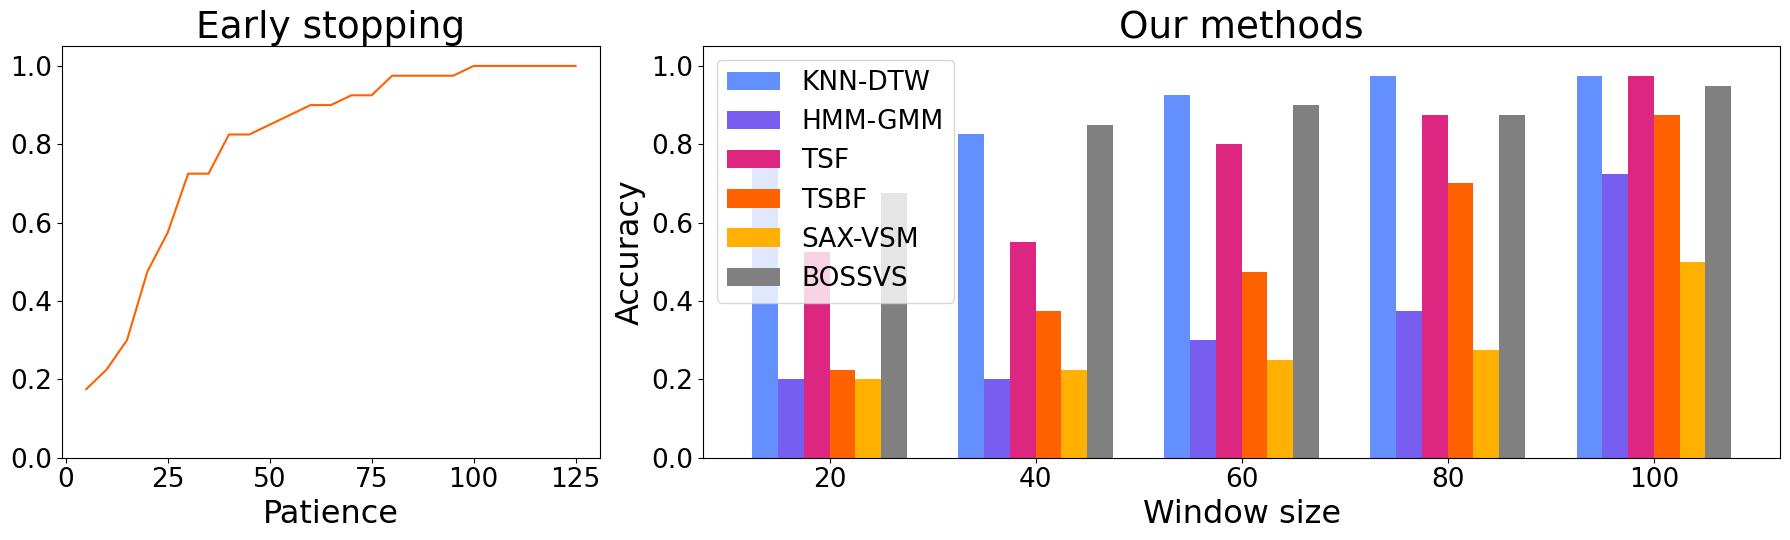

In [52]:
barWidth = 1.0 / 8
fig, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 2]})
fig.set_size_inches(18, 5.5)

ax = axs.item(1)
# window_sizes_str = ['10', '25', '50', '75', '100']
window_sizes = [str(w) for w in WINDOW_SIZES]
print(window_sizes)
# Set position of bar on X axis
brs = [np.arange(len(window_sizes))]
for i in range(len(TS_SHOWS) - 1):
    brs.append(brs[i] + barWidth)
for i, (br, ts) in enumerate(zip(brs, TS_SHOWS.values())):
    vs = cls_res.groupby("ts").get_group(ts)["correct_rate"]
    # print(br, vs.values)
    ax.bar(
        br, vs, color=COLOR_PLATE[i], width=barWidth, label=ts
    )


fontsize = 23
titlesize = 27
ticksize = 19

# Adding Xticks
ax.set_xlabel('Window size', fontsize=fontsize)
ax.set_ylabel('Accuracy', fontsize=fontsize)
ax.set_xticks(
    [r + barWidth*2.5 for r in range(len(window_sizes))]
)
ax.set_xticklabels(window_sizes)
ax.xaxis.set_tick_params(labelsize=ticksize)
ax.yaxis.set_tick_params(labelsize=ticksize)
ax.set_ylim(0.0, 1.05)
ax.set_title("Our methods", fontsize=titlesize)

ax.legend(loc="upper left", fontsize=ticksize)


# fig, ax = plt.subplots()
# # fig.set_size_inches(6.4, 4.8)
# fig.set_size_inches(6.5, 6.5)

ax = axs.item(0)
for_plot = es_patience_res[es_patience_res["patience"] <= 125]
ax.plot(for_plot["patience"], for_plot["correct_rate"], color=COLOR_PLATE[3])
ax.set_xlabel("Patience", fontsize=fontsize)
# ax.set_ylabel("Accuracy", fontsize=16)
ax.xaxis.set_tick_params(labelsize=ticksize)
ax.yaxis.set_tick_params(labelsize=ticksize)
ax.set_ylim(0.0, 1.05)
ax.set_title("Early stopping", fontsize=titlesize)
# plt.legend(loc="lower right")
# print(fig.get_size_inches())
fig.tight_layout()
saveFig(fig, f"./figs/cmp_correct_rate.pdf")
plt.show()


2.5
[array([13.75, 33.75, 53.75, 73.75, 93.75]), array([16.25, 36.25, 56.25, 76.25, 96.25]), array([18.75, 38.75, 58.75, 78.75, 98.75]), array([ 21.25,  41.25,  61.25,  81.25, 101.25]), array([ 23.75,  43.75,  63.75,  83.75, 103.75]), array([ 26.25,  46.25,  66.25,  86.25, 106.25])]


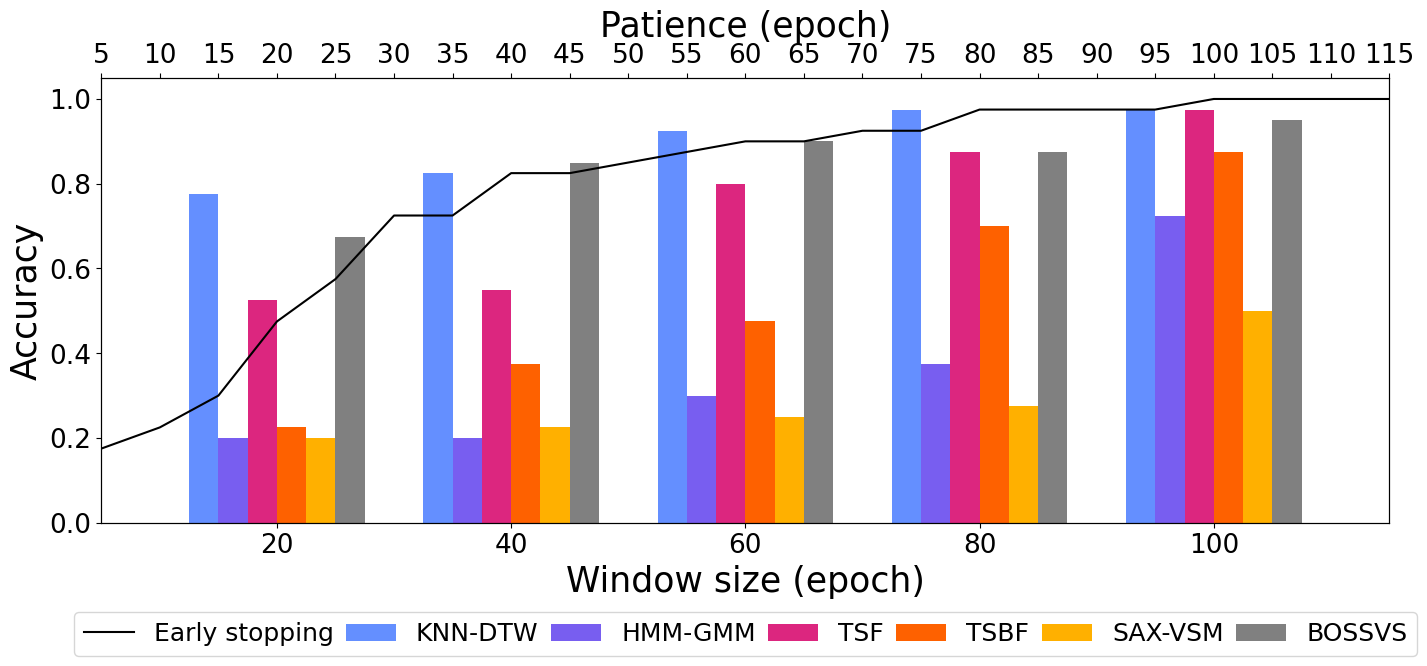

In [94]:
barWidth = 1.0 / 8
# fig, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 2]})
fig, axs = plt.subplots()
fig.set_size_inches(15, 7)

ax = axs
# ax = axs.item(1)
# window_sizes_str = ['10', '25', '50', '75', '100']
window_sizes = [str(w) for w in WINDOW_SIZES]
# print(window_sizes)
# Set position of bar on X axis
scale = 20
offset = 20-6.25
brs = [np.arange(len(window_sizes))* scale + offset]
barWidth = barWidth * scale
for i in range(len(TS_SHOWS) - 1):
    brs.append((brs[i] + barWidth))
for i, (br, ts) in enumerate(zip(brs, TS_SHOWS.values())):
    vs = cls_res.groupby("ts").get_group(ts)["correct_rate"]
    # print(br, vs.values)
    ax.bar(
        br, vs, color=COLOR_PLATE[i], width=barWidth, label=ts
    )
print(barWidth)
print(brs)


fontsize = 23 + 2
titlesize = 27 + 2
ticksize = 17 + 2

# Adding Xticks
ax.set_xlabel('Window size (epoch)', fontsize=fontsize)
ax.set_ylabel('Accuracy', fontsize=fontsize)
# ax.set_xticks(
#     [(r + barWidth*2.5) * scale + offset for r in range(len(window_sizes))]
# )
ax.set_xticks(WINDOW_SIZES)
# print([(r + barWidth*2.5) * scale + offset for r in range(len(window_sizes))])
ax.set_xticklabels(window_sizes)
ax.xaxis.set_tick_params(labelsize=ticksize)
ax.yaxis.set_tick_params(labelsize=ticksize)
ax.set_ylim(0.0, 1.05)
ax.set_xlim(5, 115)
# ax.set_title("Our methods", fontsize=titlesize)



# fig, ax = plt.subplots()
# # fig.set_size_inches(6.4, 4.8)
# fig.set_size_inches(6.5, 6.5)

# ax = axs.item(0)
ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
# for_plot = es_patience_res[es_patience_res["patience"] <= 125]
ax2.plot(for_plot["patience"], for_plot["correct_rate"], color='k')
ax2.set_xlabel("Patience (epoch)", fontsize=fontsize)
# # ax.set_ylabel("Accuracy", fontsize=16)
ax2.set_xticks(list(range(5, 120, 5)))
ax2.xaxis.set_tick_params(labelsize=ticksize)
# ax2.yaxis.set_tick_params(labelsize=ticksize)
# ax.set_ylim(0.0, 1.05)
# ax.set_title("Early stopping", fontsize=titlesize)

# plt.legend(loc="lower right")
# print(fig.get_size_inches())
ax.plot(np.nan, np.nan, label="Early stopping", color='k')
# ax.legend(loc="upper left", fontsize=ticksize)
# ax.legend(loc='center left', fontsize=ticksize, bbox_to_anchor=(1, 0.3))
ax.legend(loc='center', fontsize=ticksize-1, bbox_to_anchor=(0.5, -0.25), ncol=7, columnspacing=0.5, frameon=True)

fig.tight_layout()
saveFig(fig, f"./figs/cmp_correct_rate_small.pdf")
plt.show()


6
18


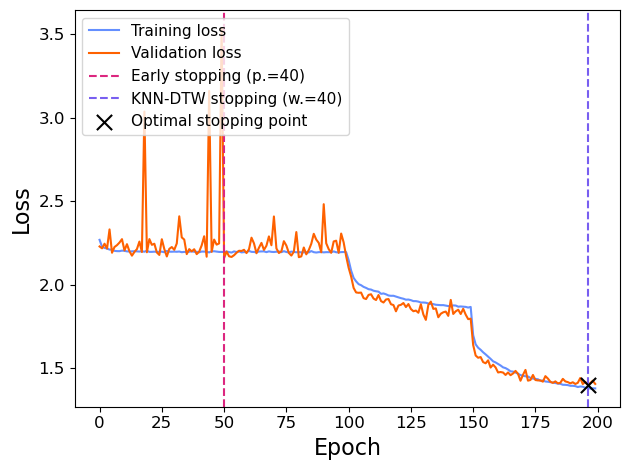

KeyboardInterrupt: 

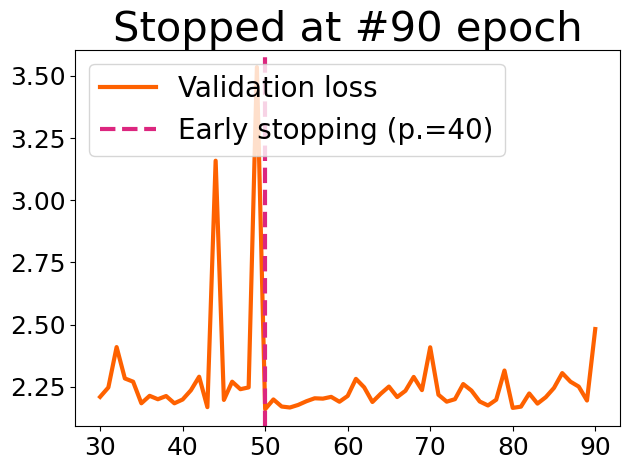

In [47]:
window_size = 40
step_size = 10
patience = 40

# window_size = 100
# step_size = 10
# patience = 100

cls_name = "knndtw"
# cls_name = "bossvs"

opt_res = pd.read_csv(OUT_PATH / "opt_es.csv")
file_name = f"patience_{patience}.csv"
es_res = pd.read_csv(OUT_PATH / file_name)
dp = list(OUT_PATH.glob(f"{cls_name}_*_{window_size}_{step_size}.csv"))[0]
tsc_res = pd.read_csv(dp)
tsc_res = tsc_res.sort_values("name").reset_index().copy()
es_res = es_res.sort_values("name").reset_index().copy()
opt_res = opt_res.sort_values("name").reset_index().copy()

loss_lower_mask = tsc_res["best_loss"] < es_res["early_best_loss"]
earlier_mask = tsc_res["stop_epoch"] < es_res["early_stop_epoch"]
later_mask = tsc_res["stop_epoch"] > es_res["early_stop_epoch"]
mask = np.logical_and(loss_lower_mask, later_mask)
# mask = earlier_mask
print(sum(mask))

# idx = 24
# for idx in (tsc_res.loc[mask, "best_loss"] / es_res.loc[mask, "early_best_loss"]).sort_values().index[:]:
# for idx in [24, 3, 27, 33]:
# for idx in [3, ]:
for idx in (tsc_res.loc[mask, "best_loss"] / es_res.loc[mask, "early_best_loss"]).sort_values().index:
    print(idx)
    data_idx = training_set.names.index(tsc_res.iloc[idx]["name"])
    cur_data = training_set.data[data_idx]
    opt_stop_idx = opt_res.iloc[idx]["early_stop_epoch"]
    es_stop_idx = es_res.iloc[idx]["early_stop_epoch"]
    tsc_stop_idx = tsc_res.iloc[idx]["stop_epoch"]
    # if tsc_stop_idx < 200:
    #     continue

    linewidth = 3
    fontsize = 20
    ticksize = 18
    textsize = fontsize + 4

    fig, ax = plt.subplots()
    fig.set_size_inches(6.4, 4.8)
    plt.plot(cur_data["train_metric"], label="Training loss", color=COLOR_PLATE[0])
    plt.plot(cur_data["monitor_metric"], label="Validation loss", color=COLOR_PLATE[3])

    # ax.axvline(opt_res.iloc[idx]["early_best_epoch"], ls="--", color="k", alpha=0.5, label="Optimal stopping point")
    # ax.axvline(es_res.iloc[idx]["early_best_epoch"], ls="--", color="r", alpha=0.5, label=f"Early stopping (p.={patience})")
    ax.axvline(es_res.iloc[idx]["early_best_epoch"], ls="--", color=COLOR_PLATE[2], alpha=1., label=f"Early stopping (p.={patience})")
    # ax.axvline(tsc_res.iloc[idx]["best_epoch"], ls="--", color="b", alpha=0.5, label="Time series stopping")
    ax.axvline(tsc_res.iloc[idx]["best_epoch"], ls="--", color=COLOR_PLATE[1], alpha=1., label=f"KNN-DTW stopping (w.={window_size})")

    opt_best_epoch = opt_res.iloc[idx]["early_best_epoch"]
    # ax.arrow(opt_best_epoch, cur_data["monitor_metric"][opt_best_epoch], 10, 10, ls="--", color="k", alpha=0.5, label="Optimal stopping point")
    ax.scatter(opt_best_epoch, cur_data["monitor_metric"][opt_best_epoch], color="k", marker="x", s=120, zorder=3, label="Optimal stopping point")
    ax.set_xlabel("Epoch", fontsize=fontsize - 4)
    ax.set_ylabel("Loss", fontsize=fontsize - 4)

    ax.xaxis.set_tick_params(labelsize=ticksize - 6)
    ax.yaxis.set_tick_params(labelsize=ticksize - 6)
    plt.legend(loc="upper left", fontsize=fontsize - 9)
    # print(fig.get_size_inches())
    fig.tight_layout()
    saveFig(fig, f"./figs/{idx}_{window_size}_{step_size}.png")
    plt.show()

    fig, ax = plt.subplots()
    fig.set_size_inches(6.4, 4.8)
    es_show_size = int(patience * 1.5)
    es_stop_p1, es_stop_p2 = es_stop_idx-es_show_size, es_stop_idx+1
    if es_stop_p1 < 0:
        es_stop_p1 = 0
    xs = list(range(es_stop_p1, es_stop_p2))
    # print(xs)
    # print(cur_data["monitor_metric"][es_stop_idx-patience:es_stop_idx+1])
    # plt.plot(cur_data["train_metric"][es_stop_idx-patience+1:es_stop_idx+1], label="Training loss")
    plt.plot(xs, cur_data["monitor_metric"][es_stop_p1:es_stop_p2], color=COLOR_PLATE[3], label="Validation loss", linewidth=linewidth)
    # plt.plot(xs, cur_data["monitor_metric"][es_stop_p1:es_stop_p2], color=COLOR_PLATE[3], label="Validation loss", linewidth=linewidth)
    ax.axvline(es_res.iloc[idx]["early_best_epoch"], color=COLOR_PLATE[2], ls="--", alpha=1.0, label=f"Early stopping (p.={patience})", linewidth=linewidth)
    # ax.text(es_stop_p2 - es_show_size // 2, cur_data["monitor_metric"][es_stop_p2], f"stopped at epoch #{es_stop_p2}", fontsize=fontsize)
    # ax.text(0.7, 0.03, f"stopped at #{es_stop_p2} epoch", 
    #     fontsize=textsize, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    ax.set_title(f"Stopped at #{es_stop_p2 - 1} epoch", fontsize=textsize + 6)

    # ax.set_xlim(0, patience*2)
    ax.xaxis.set_tick_params(labelsize=ticksize)
    ax.yaxis.set_tick_params(labelsize=ticksize)
    plt.legend(loc="upper left", fontsize=fontsize)
    # print(fig.get_size_inches())
    fig.tight_layout()
    saveFig(fig, f"./figs/{idx}_{window_size}_{step_size}_es.png")
    plt.show()

    fig, ax = plt.subplots()
    fig.set_size_inches(6.4, 4.8)
    tsc_show_size = window_size
    tsc_stop_p1, tsc_stop_p2 = tsc_stop_idx-tsc_show_size, tsc_stop_idx+1
    if tsc_stop_p1 < 0:
        tsc_stop_p1 = 0
    xs = list(range(tsc_stop_p1, tsc_stop_p2))
    # plt.plot(cur_data["train_metric"][tsc_stop_idx-window_size+1:tsc_stop_idx+1], label="Training loss")
    plt.plot(xs, cur_data["monitor_metric"][tsc_stop_p1:tsc_stop_p2], color=COLOR_PLATE[3], label="Validation loss", linewidth=linewidth)
    
    if tsc_res.iloc[idx]["best_epoch"] < tsc_stop_p1:
        plt.plot(
            list(range(tsc_res.iloc[idx]["best_epoch"], tsc_stop_p1 + 1)), 
            cur_data["monitor_metric"][tsc_res.iloc[idx]["best_epoch"]:tsc_stop_p1 + 1], 
            ls="--", color=COLOR_PLATE[3], linewidth=linewidth, label="Validation loss (not stopped)"
        )

    # ax.axvline(tsc_res.iloc[idx]["best_epoch"], ls="--", color=COLOR_PLATE[1], alpha=1.0, label=f"KNN-DTW stopping (w.={window_size})", linewidth=linewidth)
    ax.axvline(tsc_res.iloc[idx]["best_epoch"], ls="--", color=COLOR_PLATE[1], alpha=1.0, label=f"Our method (w.={window_size})", linewidth=linewidth)
    ax.set_title(f"Stopped at #{tsc_stop_p2 - 1} epoch", fontsize=textsize + 6)
    # ax.text(0.7, 0.03, f"stopped at #{tsc_stop_p2} epoch", 
    #     fontsize=textsize, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    ax.xaxis.set_tick_params(labelsize=ticksize)
    ax.yaxis.set_tick_params(labelsize=ticksize)
    # ax.axvline(tsc_res.iloc[idx]["stop_epoch"], ls="--", color="g", alpha=0.5, label="Time series stopped")

    # ax.set_xlim(0, patience*2)
    plt.legend(loc="upper left", fontsize=fontsize)
    # print(fig.get_size_inches())
    fig.tight_layout()
    # saveFig(fig, f"./figs/{idx}_{window_size}_{step_size}_tsc.png")
    saveFig(fig, f"./figs/{idx}_{window_size}_{step_size}_tsc_ours.png")
    plt.show()
    # break

6
25


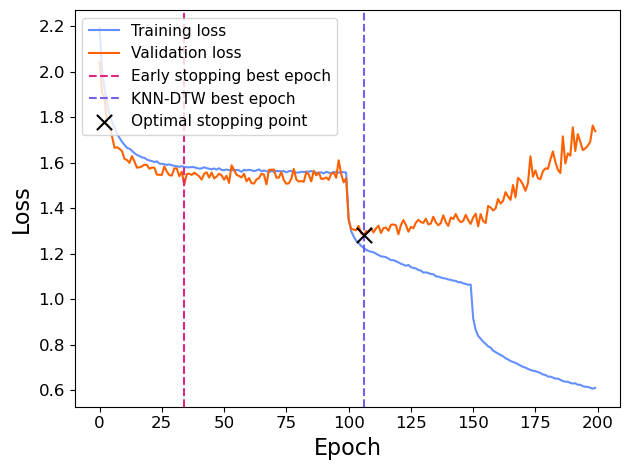

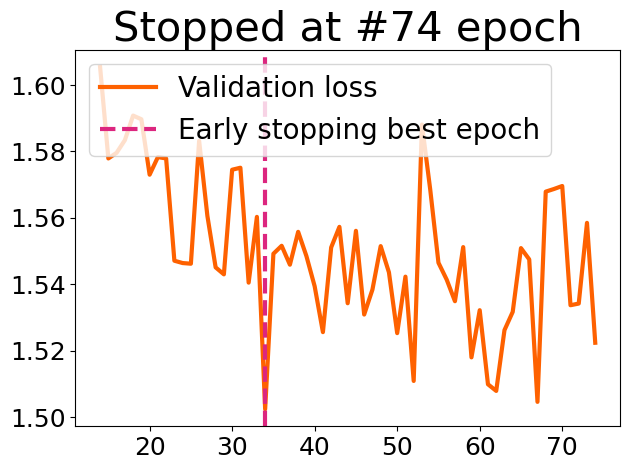

best epochs for es and tsc:  34 106


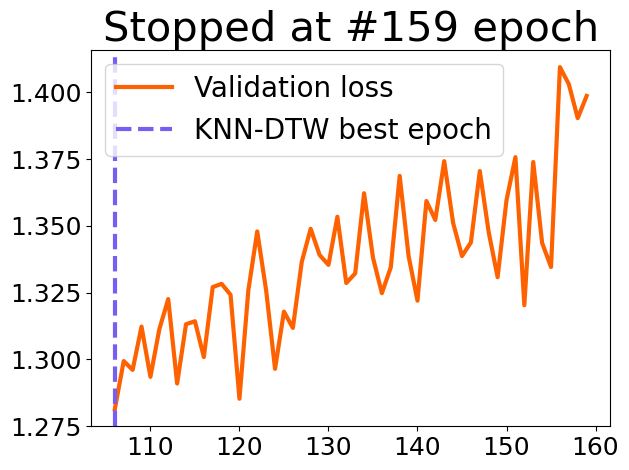

3


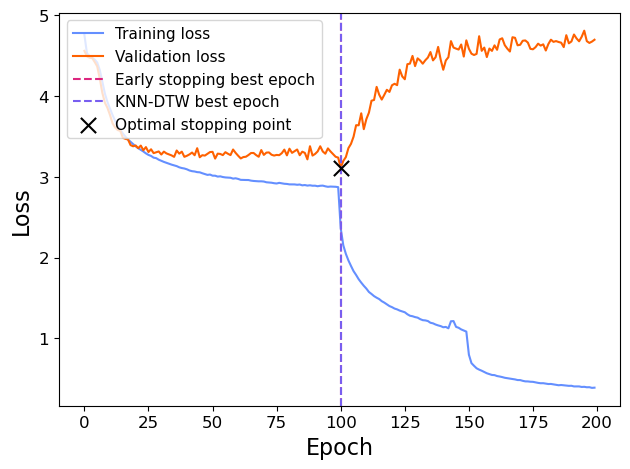

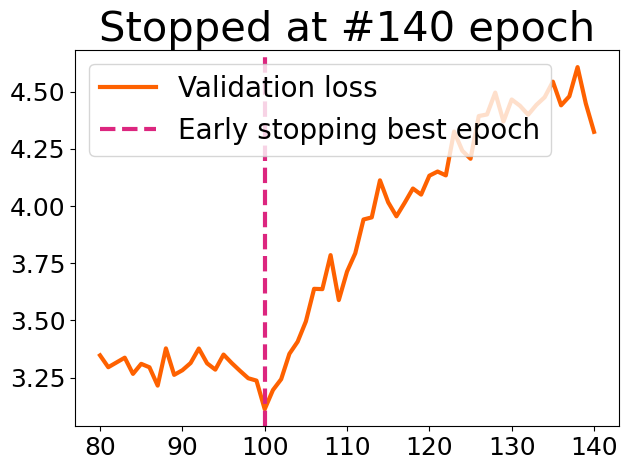

best epochs for es and tsc:  100 100


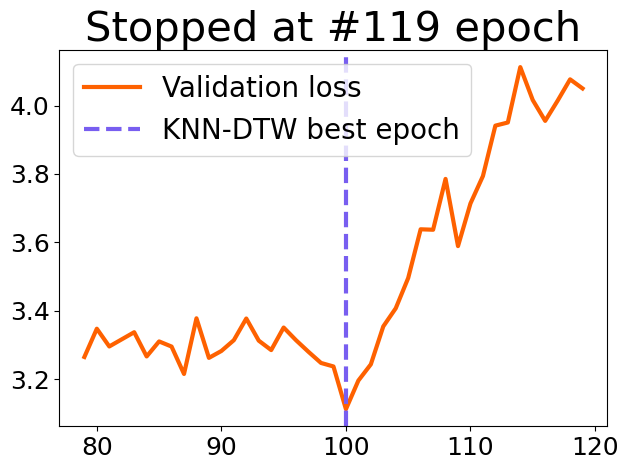

In [103]:
window_size = 40
step_size = 10
patience = 40


cls_name = "knndtw"

opt_res = pd.read_csv(OUT_PATH / "opt_es.csv")
file_name = f"patience_{patience}.csv"
es_res = pd.read_csv(OUT_PATH / file_name)
dp = list(OUT_PATH.glob(f"{cls_name}_*_{window_size}_{step_size}.csv"))[0]
tsc_res = pd.read_csv(dp)
tsc_res = tsc_res.sort_values("name").reset_index().copy()
es_res = es_res.sort_values("name").reset_index().copy()
opt_res = opt_res.sort_values("name").reset_index().copy()

loss_lower_mask = tsc_res["best_loss"] < es_res["early_best_loss"]
earlier_mask = tsc_res["stop_epoch"] < es_res["early_stop_epoch"]
later_mask = tsc_res["stop_epoch"] > es_res["early_stop_epoch"]
mask = np.logical_and(loss_lower_mask, later_mask)
# mask = earlier_mask
print(sum(mask))

# idx = 24
# for idx in (tsc_res.loc[mask, "best_loss"] / es_res.loc[mask, "early_best_loss"]).sort_values().index[:]:
for idx in [25, 3]:
# for idx in [3, ]:
# for idx in (tsc_res.loc[mask, "best_loss"] / es_res.loc[mask, "early_best_loss"]).sort_values().index:
    print(idx)
    data_idx = training_set.names.index(tsc_res.iloc[idx]["name"])
    cur_data = training_set.data[data_idx]
    opt_stop_idx = opt_res.iloc[idx]["early_stop_epoch"]
    es_stop_idx = es_res.iloc[idx]["early_stop_epoch"]
    tsc_stop_idx = tsc_res.iloc[idx]["stop_epoch"]
    # if tsc_stop_idx < 200:
    #     continue

    linewidth = 3
    fontsize = 20
    ticksize = 18
    textsize = fontsize + 4

    fig, ax = plt.subplots()
    fig.set_size_inches(6.4, 4.8)
    plt.plot(cur_data["train_metric"], label="Training loss", color=COLOR_PLATE[0])
    plt.plot(cur_data["monitor_metric"], label="Validation loss", color=COLOR_PLATE[3])

    # ax.axvline(opt_res.iloc[idx]["early_best_epoch"], ls="--", color="k", alpha=0.5, label="Optimal stopping point")
    # ax.axvline(es_res.iloc[idx]["early_best_epoch"], ls="--", color="r", alpha=0.5, label=f"Early stopping (p.={patience})")
    ax.axvline(es_res.iloc[idx]["early_best_epoch"], ls="--", color=COLOR_PLATE[2], alpha=1., label=f"Early stopping best epoch")
    # ax.axvline(es_res.iloc[idx]["early_stop_epoch"], ls="--", color=COLOR_PLATE[2], alpha=1., label=f"Early stopping (p.={patience})")
    # ax.axvline(tsc_res.iloc[idx]["best_epoch"], ls="--", color="b", alpha=0.5, label="Time series stopping")
    ax.axvline(tsc_res.iloc[idx]["best_epoch"], ls="--", color=COLOR_PLATE[1], alpha=1., label=f"KNN-DTW best epoch")
    # ax.axvline(tsc_res.iloc[idx]["stop_epoch"], ls="--", color=COLOR_PLATE[1], alpha=1., label=f"KNN-DTW stopping (w.={window_size})")

    opt_best_epoch = opt_res.iloc[idx]["early_best_epoch"]
    # ax.arrow(opt_best_epoch, cur_data["monitor_metric"][opt_best_epoch], 10, 10, ls="--", color="k", alpha=0.5, label="Optimal stopping point")
    ax.scatter(opt_best_epoch, cur_data["monitor_metric"][opt_best_epoch], color="k", marker="x", s=120, zorder=3, label="Optimal stopping point")
    ax.set_xlabel("Epoch", fontsize=fontsize - 4)
    ax.set_ylabel("Loss", fontsize=fontsize - 4)

    ax.xaxis.set_tick_params(labelsize=ticksize - 6)
    ax.yaxis.set_tick_params(labelsize=ticksize - 6)
    plt.legend(loc="upper left", fontsize=fontsize - 9)
    # print(fig.get_size_inches())
    fig.tight_layout()
    saveFig(fig, f"./figs/{idx}_{window_size}_{step_size}.png")
    plt.show()

    fig, ax = plt.subplots()
    fig.set_size_inches(6.4, 4.8)
    es_show_size = int(patience * 1.5)
    es_stop_p1, es_stop_p2 = es_stop_idx-es_show_size, es_stop_idx+1
    if es_stop_p1 < 0:
        es_stop_p1 = 0
    xs = list(range(es_stop_p1, es_stop_p2))
    # print(xs)
    # print(cur_data["monitor_metric"][es_stop_idx-patience:es_stop_idx+1])
    # plt.plot(cur_data["train_metric"][es_stop_idx-patience+1:es_stop_idx+1], label="Training loss")
    plt.plot(xs, cur_data["monitor_metric"][es_stop_p1:es_stop_p2], color=COLOR_PLATE[3], label="Validation loss", linewidth=linewidth)
    # plt.plot(xs, cur_data["monitor_metric"][es_stop_p1:es_stop_p2], color=COLOR_PLATE[3], label="Validation loss", linewidth=linewidth)
    ax.axvline(es_res.iloc[idx]["early_best_epoch"], color=COLOR_PLATE[2], ls="--", alpha=1.0, label=f"Early stopping best epoch", linewidth=linewidth)
    # ax.text(es_stop_p2 - es_show_size // 2, cur_data["monitor_metric"][es_stop_p2], f"stopped at epoch #{es_stop_p2}", fontsize=fontsize)
    # ax.text(0.7, 0.03, f"stopped at #{es_stop_p2} epoch", 
    #     fontsize=textsize, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    ax.set_title(f"Stopped at #{es_stop_p2 - 1} epoch", fontsize=textsize + 6)

    # ax.set_xlim(0, patience*2)
    ax.xaxis.set_tick_params(labelsize=ticksize)
    ax.yaxis.set_tick_params(labelsize=ticksize)
    plt.legend(loc="upper left", fontsize=fontsize)
    # print(fig.get_size_inches())
    fig.tight_layout()
    saveFig(fig, f"./figs/{idx}_{window_size}_{step_size}_es.png")
    plt.show()

    fig, ax = plt.subplots()
    fig.set_size_inches(6.4, 4.8)
    tsc_show_size = window_size


    # tsc_stop_p1, tsc_stop_p2 = tsc_stop_idx-tsc_show_size, tsc_stop_idx+1
    # if tsc_stop_p1 < 0:
    #     tsc_stop_p1 = 0
    # xs = list(range(tsc_stop_p1, tsc_stop_p2))
    # plt.plot(cur_data["train_metric"][tsc_stop_idx-window_size+1:tsc_stop_idx+1], label="Training loss")


    tsc_stop_p1, tsc_stop_p2 = min(tsc_stop_idx-tsc_show_size, tsc_res.iloc[idx]["best_epoch"]), tsc_stop_idx+1
    if tsc_stop_p1 < 0:
        tsc_stop_p1 = 0
    plt.plot(list(range(tsc_stop_p1, tsc_stop_p2)), cur_data["monitor_metric"][tsc_stop_p1:tsc_stop_p2], color=COLOR_PLATE[3], label="Validation loss", linewidth=linewidth)
    # plt.plot(xs, cur_data["monitor_metric"][tsc_stop_p1:tsc_stop_p2], color=COLOR_PLATE[3], label="Validation loss", linewidth=linewidth)
    
    # if tsc_res.iloc[idx]["best_epoch"] < tsc_stop_p1:
    #     plt.plot(
    #         list(range(tsc_res.iloc[idx]["best_epoch"], tsc_stop_p1 + 1)), 
    #         cur_data["monitor_metric"][tsc_res.iloc[idx]["best_epoch"]:tsc_stop_p1 + 1], 
    #         ls="--", color=COLOR_PLATE[3], linewidth=linewidth, label="Validation loss (not stopped)"
    #     )

    ax.axvline(tsc_res.iloc[idx]["best_epoch"], ls="--", color=COLOR_PLATE[1], alpha=1.0, label=f"KNN-DTW best epoch", linewidth=linewidth)
    # ax.axvline(tsc_res.iloc[idx]["best_epoch"], ls="--", color=COLOR_PLATE[1], alpha=1.0, label=f"Our method best epoch", linewidth=linewidth)
    ax.set_title(f"Stopped at #{tsc_stop_p2 - 1} epoch", fontsize=textsize + 6)
    # ax.text(0.7, 0.03, f"stopped at #{tsc_stop_p2} epoch", 
    #     fontsize=textsize, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    ax.xaxis.set_tick_params(labelsize=ticksize)
    ax.yaxis.set_tick_params(labelsize=ticksize)
    # ax.axvline(tsc_res.iloc[idx]["stop_epoch"], ls="--", color="g", alpha=0.5, label="Time series stopped")
    print("best epochs for es and tsc: ", es_res.iloc[idx]["early_best_epoch"], tsc_res.iloc[idx]["best_epoch"])
    # ax.set_xlim(0, patience*2)
    plt.legend(loc="upper left", fontsize=fontsize)
    # print(fig.get_size_inches())
    fig.tight_layout()
    saveFig(fig, f"./figs/{idx}_{window_size}_{step_size}_tsc.png")
    # saveFig(fig, f"./figs/{idx}_{window_size}_{step_size}_tsc_ours.png")
    plt.show()
    # break

3


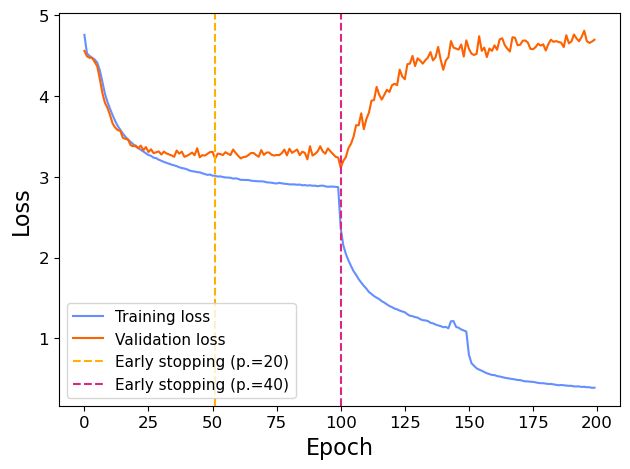

In [ ]:
p1 = 20
p2 = 40
es_25_res = pd.read_csv(OUT_PATH / f"patience_{p1}.csv")
es_25_res = es_25_res.sort_values("name").reset_index().copy()
es_50_res = pd.read_csv(OUT_PATH / f"patience_{p2}.csv")
es_50_res = es_50_res.sort_values("name").reset_index().copy()
for idx in [3,]:
    print(idx)
    data_idx = training_set.names.index(tsc_res.iloc[idx]["name"])
    cur_data = training_set.data[data_idx]

    es_25_stop_idx = es_25_res.iloc[idx]["early_stop_epoch"]
    es_50_stop_idx = es_50_res.iloc[idx]["early_stop_epoch"]

    linewidth = 3
    fontsize = 20
    ticksize = 18
    textsize = fontsize + 4

    fig, ax = plt.subplots()
    fig.set_size_inches(6.4, 4.8)
    plt.plot(cur_data["train_metric"], label="Training loss", color=COLOR_PLATE[0])
    plt.plot(cur_data["monitor_metric"], label="Validation loss", color=COLOR_PLATE[3])
    ax.axvline(es_25_res.iloc[idx]["early_best_epoch"], ls="--", color=COLOR_PLATE[4], alpha=1., label=f"Early stopping (p.={p1})")
    ax.axvline(es_50_res.iloc[idx]["early_best_epoch"], ls="--", color=COLOR_PLATE[2], alpha=1., label=f"Early stopping (p.={p2})")
    ax.set_xlabel("Epoch", fontsize=fontsize - 4)
    ax.set_ylabel("Loss", fontsize=fontsize - 4)
    ax.xaxis.set_tick_params(labelsize=ticksize - 6)
    ax.yaxis.set_tick_params(labelsize=ticksize - 6)
    plt.legend(loc="lower left", fontsize=fontsize - 9)
    fig.tight_layout()
    saveFig(fig, f"./figs/{idx}_patience_{p1}_vs_{p2}.png")
    saveFig(fig, f"./figs/{idx}_patience_{p1}_vs_{p2}.pdf")
    plt.show()

6


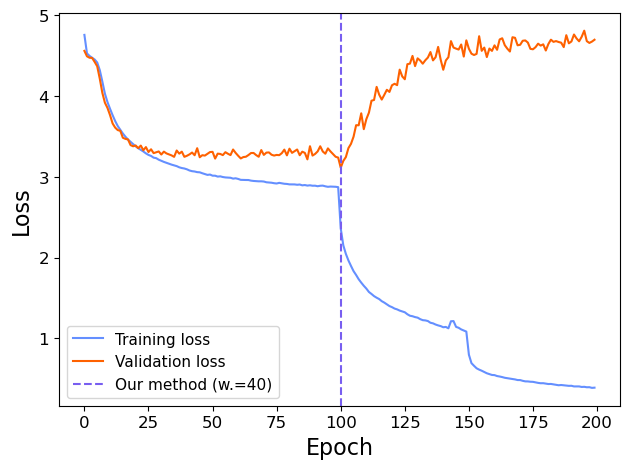

In [ ]:
window_size = 40
step_size = 10

cls_name = "knndtw"
dp = list(OUT_PATH.glob(f"{cls_name}_*_{window_size}_{step_size}.csv"))[0]
tsc_res = pd.read_csv(dp)
tsc_res = tsc_res.sort_values("name").reset_index().copy()

loss_lower_mask = tsc_res["best_loss"] < es_res["early_best_loss"]
earlier_mask = tsc_res["stop_epoch"] < es_res["early_stop_epoch"]
later_mask = tsc_res["stop_epoch"] > es_res["early_stop_epoch"]
mask = np.logical_and(loss_lower_mask, later_mask)
# mask = earlier_mask
print(sum(mask))

for idx in [3, ]:
    data_idx = training_set.names.index(tsc_res.iloc[idx]["name"])
    cur_data = training_set.data[data_idx]
    opt_stop_idx = opt_res.iloc[idx]["early_stop_epoch"]
    es_stop_idx = es_res.iloc[idx]["early_stop_epoch"]
    tsc_stop_idx = tsc_res.iloc[idx]["stop_epoch"]
    # if tsc_stop_idx < 200:
    #     continue

    linewidth = 3
    fontsize = 20
    ticksize = 18
    textsize = fontsize + 4

    fig, ax = plt.subplots()
    fig.set_size_inches(6.4, 4.8)
    plt.plot(cur_data["train_metric"], label="Training loss", color=COLOR_PLATE[0])
    plt.plot(cur_data["monitor_metric"], label="Validation loss", color=COLOR_PLATE[3])

    ax.axvline(tsc_res.iloc[idx]["best_epoch"], ls="--", color=COLOR_PLATE[1], alpha=1., label=f"Our method (w.={window_size})")
    # ax.axvline(tsc_res.iloc[idx]["best_epoch"], ls="--", color=COLOR_PLATE[1], alpha=1., label=f"KNN-DTW stopping (w.={window_size})")

    # opt_best_epoch = opt_res.iloc[idx]["early_best_epoch"]
    # ax.scatter(opt_best_epoch, cur_data["monitor_metric"][opt_best_epoch], color="k", marker="x", s=120, zorder=3, label="Optimal stopping point")

    ax.set_xlabel("Epoch", fontsize=fontsize - 4)
    ax.set_ylabel("Loss", fontsize=fontsize - 4)

    ax.xaxis.set_tick_params(labelsize=ticksize - 6)
    ax.yaxis.set_tick_params(labelsize=ticksize - 6)
    plt.legend(loc="lower left", fontsize=fontsize - 9)
    # print(fig.get_size_inches())
    fig.tight_layout()
    # saveFig(fig, f"./figs/{idx}_opt_only_{window_size}_{step_size}.pdf")
    saveFig(fig, f"./figs/{idx}_tsc_only_{window_size}_{step_size}.png")
    plt.show()


In [ ]:
# stopped early
earlier_mask = tsc_res["stop_epoch"] < es_res["early_stop_epoch"]
print("earlier_mask:", sum(earlier_mask), len(tsc_correct), len(earlier_mask))
for n1, n2 in zip(tsc_res["name"], opt_res["name"]):
    assert n1 == n2
# print(tsc_correct, earlier_mask)
same_as_opt = opt_res[earlier_mask]["early_stop_epoch"] == tsc_res[earlier_mask]["stop_epoch"]
print("[earlier_mask tsc] same_as_opt:", sum(same_as_opt))
print(sum(np.logical_and(tsc_correct, earlier_mask)))
print(opt_res[earlier_mask])
print(tsc_res[np.logical_and(tsc_correct, earlier_mask)])
earlier_mask[earlier_mask]

earlier_mask: 23 40 40
[earlier_mask tsc] same_as_opt: 0
22
    index  label                                          name  is_early_stop  \
0       0      1                              cifar100_AT.json              1   
1      29      0                           cifar100_KDSWA.json              1   
2       9      1               cifar100_l2_preactresnet18.json              1   
3       5      1                           cifar100_lisht.json              1   
4      32      0                            cifar100_mish.json              1   
5       6      1                            cifar100_relu.json              1   
6      33      0                            cifar100_silu.json              1   
7      10      1         cifar100_standard_preactresnet18.json              1   
9      30      0                            cifar10_KDSWA.json              1   
10     11      1           cifar10_fgsm_l2_preactresnet18.json              1   
15     14      1           cifar10_l1_preactresne

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
9     True
10    True
15    True
16    True
17    True
19    True
20    True
21    True
22    True
23    True
26    True
28    True
29    True
31    True
32    True
dtype: bool

In [ ]:
classifier_res = classifier_stop_res[["name", "detected_epoch", "stop_epoch", "stop_loss"]].copy()
classifier_res

NameError: name 'classifier_stop_res' is not defined

In [ ]:
for patience in patiences:
    file_name = f"patience_{patience}.csv"
    data = pd.read_csv(OUT_PATH / file_name)
es_res = data[["name", "early_stop_epoch", "early_stop_epoch_loss", "optimal_early_stop_epoch", "optimal_early_stop_epoch_loss"]].copy()
merged = es_res.merge(classifier_res, on="name")
mask = merged["stop_loss"] < merged["early_stop_epoch_loss"] - 1e-5
print(mask.value_counts())
merged[mask]
    # print(sum(early_stop_res[f"stop_before_optimal_{patience}"] == True), len(early_stop_res[f"stop_before_optimal_{patience}"]))

False    329
True      90
dtype: int64


,name,early_stop_epoch,early_stop_epoch_loss,optimal_early_stop_epoch,optimal_early_stop_epoch_loss,detected_epoch,stop_epoch,stop_loss
44,training_log_building_model0_1.json,-1,0.037074,996,0.037050,-1,-1,0.037050
53,training_log_building_model1_1.json,-1,0.027922,994,0.027901,-1,-1,0.027901
68,training_log_building_model6_1.json,-1,0.036703,870,0.036651,950,870,0.036651
84,training_log_cancer_model10_3.json,-1,0.109453,995,0.109440,-1,-1,0.109440
85,training_log_cancer_model11_1.json,-1,0.072791,998,0.072771,-1,-1,0.072771
...,...,...,...,...,...,...,...,...
399,training_log_thyroid_model3_2.json,-1,0.240984,998,0.240877,-1,-1,0.240877
410,training_log_thyroid_model7_1.json,-1,0.222726,998,0.222636,-1,-1,0.222636
413,training_log_thyroid_model8_1.json,-1,0.230629,997,0.230046,-1,-1,0.230046
415,training_log_thyroid_model8_3.json,-1,0.214836,998,0.214639,-1,-1,0.214639


In [ ]:
# patience = 15
# classifier_window = 100
# # step = classifier_window // 2
# step = 3
# # failed = {
# #     "idx": [],
# #     "overfitted": [],
# # }
# classifier_detect_epoches = []
# classifier_is_losses_lower = []
# mask = early_stop_res[f"stop_before_optimal_{patience}"] == True
# inspecting_data = early_stop_res[mask][["label", "name", f"es_{patience}_epoch", "optimal_es_epoch", f"stop_before_optimal_{patience}"]].copy()
# for c in [f"es_{patience}_epoch", "optimal_es_epoch"]:
#     inspecting_data[c] = inspecting_data[c].astype(int)

# for name, es_epoch, opt_epoch in zip(inspecting_data["name"], inspecting_data[f"es_{patience}_epoch"], inspecting_data["optimal_es_epoch"]):
#     idx = training_set.names.index(name)
#     cur_data = training_set.data[idx]
#     # print(cur_data)
#     for i in range(0, len(cur_data["monitor_metric"]) - classifier_window + step, step):
#         window_data = {n: d[i:i+classifier_window] for n, d in cur_data.items()}
#         # print(window_data)
#         processed_data = model.preprocessor.process([window_data])
#         res = model.predict(processed_data)
#         # print(res)
#         if res:
#             # classifier_detect.append(i + classifier_window)
#             classifier_detect_epoch = window_data["monitor_metric"].argmin()
#             classifier_detect_loss_lower = window_data["monitor_metric"][classifier_detect_epoch] < cur_data["monitor_metric"][es_epoch]

#             classifier_detect_epoches.append(i + classifier_detect_epoch)
#             classifier_is_losses_lower.append(classifier_detect_loss_lower)
#             # print(es_epoch, opt_epoch)
#             # print(cur_data["monitor_metric"][es_epoch], cur_data["monitor_metric"][es_epoch], cur_data["monitor_metric"][opt_epoch])
#             print(f"{i} to {i + classifier_window}: detected overfitting", classifier_detect_loss_lower, "cmp", es_epoch, opt_epoch,
#                 cur_data["monitor_metric"][es_epoch], window_data["monitor_metric"][classifier_detect_epoch], cur_data["monitor_metric"][opt_epoch]
#             )
#             break
#     else:
#         classifier_detect_epoches.append(np.nan)
#         classifier_is_losses_lower.append(True)
#         # print(len(window_data))
#     # break
#     # model.preprocessor.process()
#     # classifier_window
#     # print(training_set.data[idx])

In [ ]:
# inspecting_data["cls better"] = classifier_is_losses_lower
# MAX_EPOCH = 1000
# # classifier_detect[classifier_detect.isna()] = MAX_EPOCH
# inspecting_data["cls epoch"] = classifier_detect_epoches
# inspecting_data.loc[inspecting_data["cls epoch"].isna(), "cls epoch"] = MAX_EPOCH
# sum(inspecting_data["cls better"] == False)
# # is the loss lower than the early stop

# # inspecting_data.to_csv("./inspect.csv", index=False)
# # inspecting_data["classifier detection"] - inspecting_data["optimal_es_epoch"]
# # (inspecting_data["optimal_es_epoch"] - inspecting_data[f"es_{patience}_epoch"]).median()